### Module 2 Assignment 1: House Prices (Kaggle)
- **Submitted By**: **Pratyush Choudhary**
- **Date** :**04/07/2023**

### Background
Compete in the  [House Prices Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). competition, where you will predict house prices in Ames, Iowa (‘SalePrice’).  You will be required to submit predictions to Kaggle.com and provide evidence of those submissions. As part of the analysis, you must address the following at a minimum. 

### Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care? 

**This question is significant because it helps individuals and organizations involved in the real estate market make informed decisions and understand the value of a property.**

**Here's why different stakeholders should care about this question:**

- **Homeowners:** Homeowners are interested in understanding how specific features and factors can impact the value of their homes. This knowledge allows them to make informed decisions about renovations, pricing, and future investments in order to maximize the value of their properties.

- **Real Estate Agents:** Real estate agents can provide better service to their clients by having knowledge about the factors that influence house prices. This allows them to give accurate pricing recommendations and insights, helping their clients make informed decisions about buying or selling a home.

- **Property Developers:** Property developers need to understand the relationship between housing features and sale prices in order to make strategic decisions about property design, amenities, and target markets. This knowledge helps them create successful and desirable developments that meet market demand.

- **Policy Makers:** Policy makers can use housing market data to analyze the demand for specific types of housing and identify areas that require revitalization or infrastructure development. By formulating effective policies based on this information, they can address housing needs and ensure a well-functioning housing market.

In short we can say that  understanding the factors that influence housing prices is crucial for various stakeholders as it enables them to make better decisions related to buying, selling, developing, and regulating housing.

### Requirements

1. Conduct your analysis using a cross-validation design.
2. Conduct EDA and provide appropriate visualizations in the process.
3. Build a minimum of two separate regression models using the training set.
4. Evaluate polynomial, indicator, dichotomous, & piecewise model components.
5. Create at least one feature from the data set.
6. Evaluate the models’ assumptions.
7. Evaluate goodness of fit metrics on the training and validation sets.
8. Submit predictions for the unseen test set available on Kaggle.com.
9. Provide your Kaggle user name and a screen snapshot of your Kaggle scores.
10. Discuss what your models tell you in layman’s terms

### Import Libraries 

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
from scipy.stats import skew
sns.set()
import datetime

import warnings
warnings.simplefilter(action='ignore')

### Load Data

In [131]:
train= pd.read_csv("train.csv")
test = pd.read_csv('test.csv')


### Section1. 
#### Conduct EDA and provide appropriate visualizations in the process.

In [132]:
#first 5 rows
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [133]:
#Number of rows and columns
train.shape,test.shape

((1460, 81), (1459, 80))

In [134]:
#information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [135]:
#Description of our dataset
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [136]:
'''
1- Positive skewness occurs when the tail of the distribution extends to the right
2- Negative skewness occurs when the tail of the distribution extends to the left
3- A symmetrical distribution has a skewness of 0,
'''
skew = train. skew()
skew

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

#### Numerical Variables

In [137]:
#Dropping & SalePrice
df_train = train.drop(['Id', 'SalePrice'], axis=1)
df_test = test.drop('Id', axis=1)

In [138]:
# List of Numerical Features
num_list = [f for f in train.columns if train.dtypes[f] != 'object']
num_list.remove('SalePrice')

# Selecting columns excluding the object (string) data type as numerical variables
num_var_train = df_train.select_dtypes(exclude='object')
num_var_test = df_test.select_dtypes(exclude='object')

# Printing the number of numerical features in the dataset
print("Number of numerical features in train dataset are: ", num_var_train.shape[1])
print("Number of numerical features in test dataset are: ", num_var_test.shape[1])

Number of numerical features in train dataset are:  36
Number of numerical features in test dataset are:  36


In [139]:
discrete=[]
for col in train.columns:
  if train[col].dtype=='int64' and len(train[col].unique())<=15:
    discrete.append(col)
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

####  Discrete Numerical Analysis

In [140]:
for col in discrete:
  print('{} has {} unique values . '.format(col,train[col].unique()))

MSSubClass has [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] unique values . 
OverallQual has [ 7  6  8  5  9  4 10  3  1  2] unique values . 
OverallCond has [5 8 6 7 4 2 3 9 1] unique values . 
BsmtFullBath has [1 0 2 3] unique values . 
BsmtHalfBath has [0 1 2] unique values . 
FullBath has [2 1 3 0] unique values . 
HalfBath has [1 0 2] unique values . 
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique values . 
KitchenAbvGr has [1 2 3 0] unique values . 
TotRmsAbvGrd has [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values . 
Fireplaces has [0 1 2 3] unique values . 
GarageCars has [2 3 1 0 4] unique values . 
PoolArea has [  0 512 648 576 555 480 519 738] unique values . 
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values . 
YrSold has [2008 2007 2006 2009 2010] unique values . 


Text(0.5, 0.98, 'Discrete Numerical Analysis')

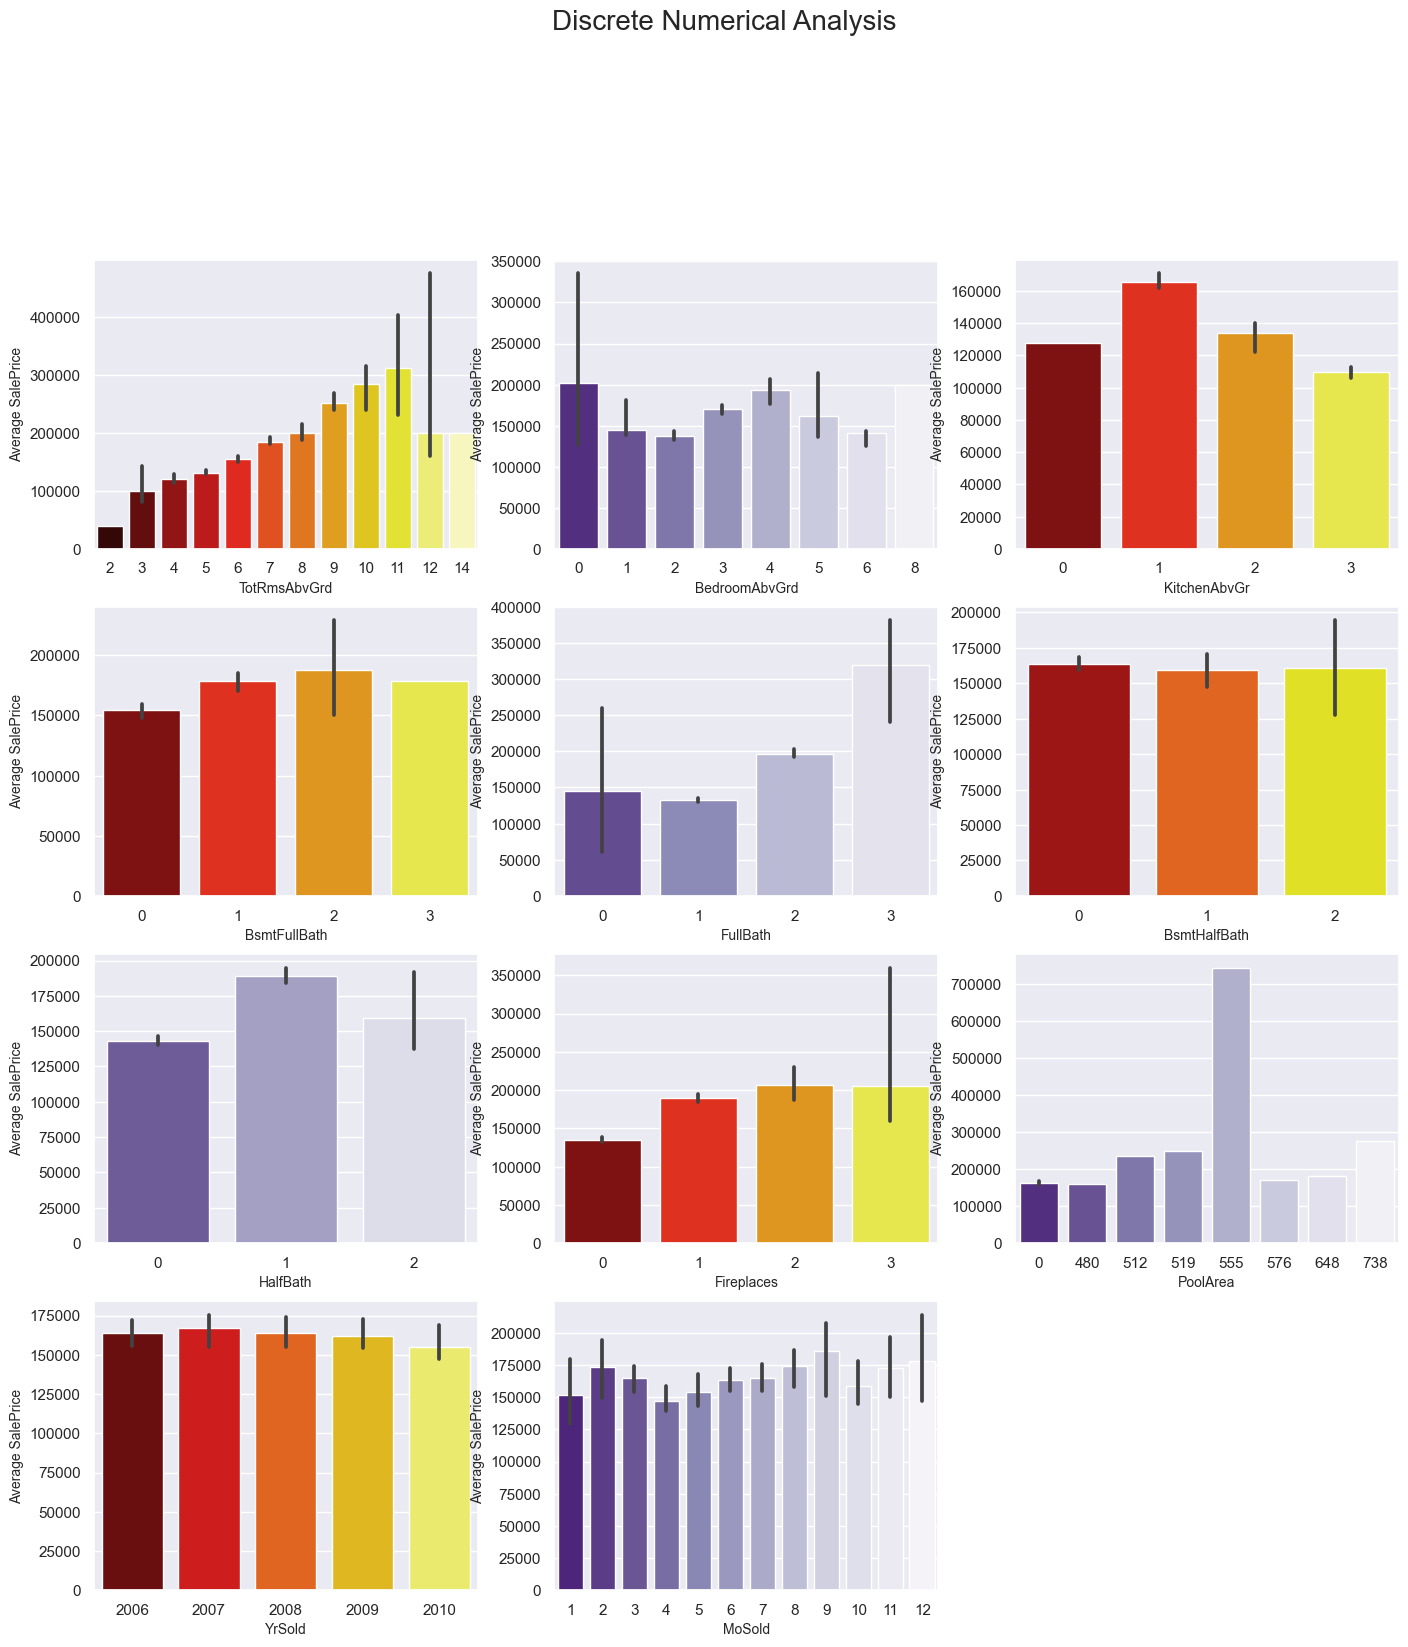

In [141]:
plt.figure(figsize=(15,25))
plt.subplot(6,3,1)
sns.barplot(data=train,x='TotRmsAbvGrd',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,2)
sns.barplot(data=train,x='BedroomAbvGr',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("BedroomAbvGrd",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,3)
sns.barplot(data=train,x='KitchenAbvGr',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("KitchenAbvGr",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,4)
sns.barplot(data=train,x='BsmtFullBath',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("BsmtFullBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,5)
sns.barplot(data=train,x='FullBath',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("FullBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,6)
sns.barplot(data=train,x='BsmtHalfBath',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("BsmtHalfBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,7)
sns.barplot(data=train,x='HalfBath',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("HalfBath",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,8)
sns.barplot(data=train,x='Fireplaces',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("Fireplaces",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,9)
sns.barplot(data=train,x='PoolArea',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("PoolArea",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,10)
sns.barplot(data=train,x='YrSold',estimator=np.median,y='SalePrice',palette='hot')
plt.xlabel("YrSold",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.subplot(6,3,11)
sns.barplot(data=train,x='MoSold',estimator=np.median,y='SalePrice',palette='Purples_r')
plt.xlabel("MoSold",fontsize=10)
plt.ylabel("Average SalePrice",fontsize=10)
plt.suptitle("Discrete Numerical Analysis",fontsize=20)

#### Observations: 

- Total Rooms Above Ground : as a total number of the rooms increases , average price of the house increase
- Bedroom Above Ground :Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
- Kitchen Above ground :- Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
- InBasemnt Full bathroomsandBasement Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less
- Now if we don't consider basement rooms,i.e Above grade Full Bathrooms and Half bathrooms .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.
- Fireplaces :- As fireplaces will increase in the house , sale price will also increase.
- poolArea :- Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price
- Year Sold :- The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.
- Month Sold :- There is not much to study about which month the house sold has higher or lower Sale Price.

#### Now we can analyze the rest of the continuous numerical features

In [142]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.

num=[]
for col in train.columns:
   if train[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [143]:
print("Numerical Features :: \n\n{}".format(num))  

Numerical Features :: 

['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


### Datetime Features
We have four year features in our dataset.

- YearBuilt
- YearRemodAdd
- GarageYrBlt
- YrSold
We will analyze these features with Sale Price and try to gather some information.

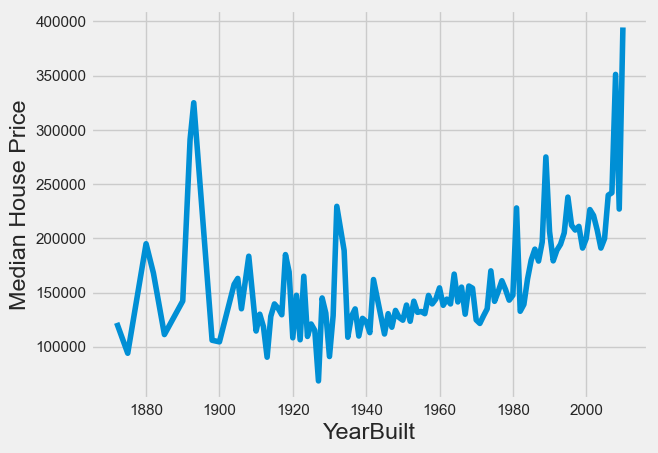

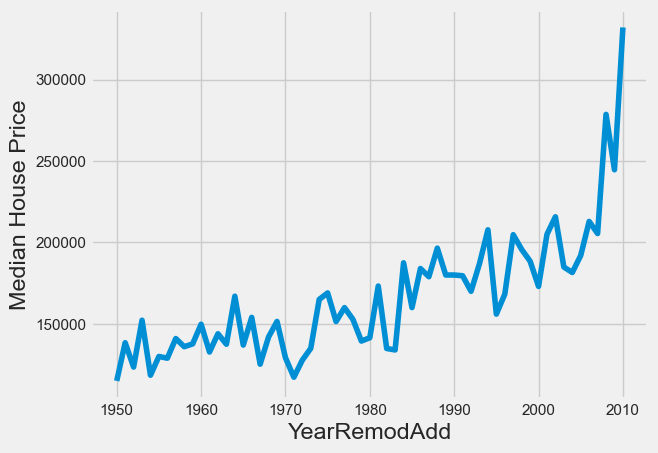

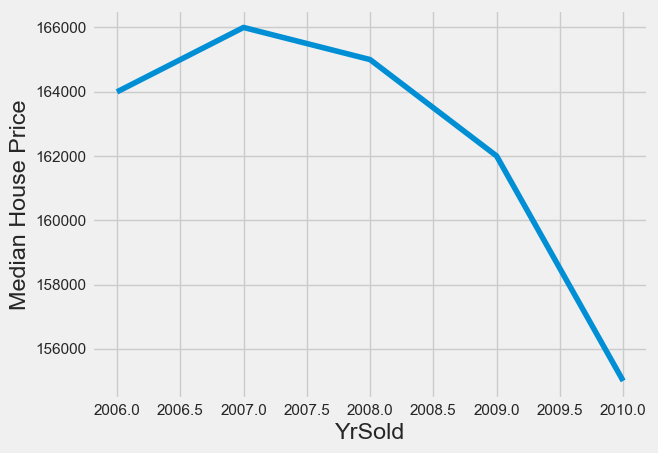

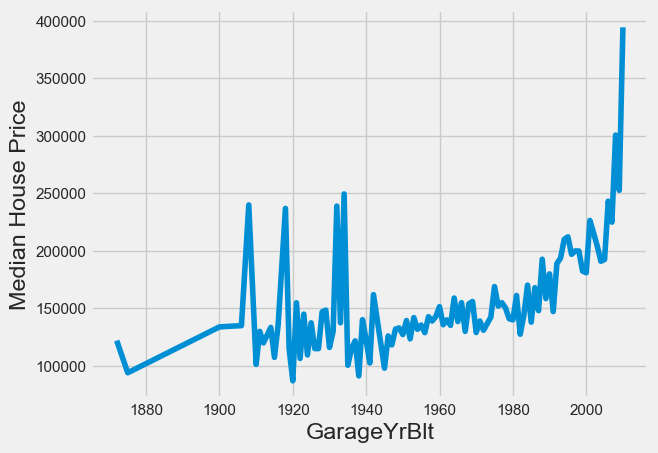

In [232]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for feature in year_features:
  ax=train.groupby([feature])['SalePrice'].median().plot()
  plt.ylabel("Median House Price")
  plt.show()

#### Categorical Variables

In [144]:
# List of Categorical Features
cat_list = [f for f in train.columns if train.dtypes[f] == 'object']

# Selecting columns with object (string) data type as categorical variables
category_var_train = df_train.select_dtypes(include='object')
category_var_test = df_test.select_dtypes(include='object')


# Printing the number of categorical features in the dataset
print("Number of categorical features in train dataset are: ", category_var_train.shape[1])
print("Number of categorical features in test dataset are: ", category_var_test.shape[1])

Number of categorical features in train dataset are:  43
Number of categorical features in test dataset are:  43


#### Observations: 

- As per above code we can say that the train dataset of house prices has 43 categorical features & 36 numerical features that can affect the target variable of `SalePrice`.

- We have dropped the `Id` column as it won't add any value for predicting the `SalePrice` and dropped `SalePrice` since it is a target variable.

In [145]:
cat=[]
for col in train.columns:
    if train[col].dtype=='object':
        cat.append(col)

#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


##  SalePrice Analysis

In [146]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [147]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

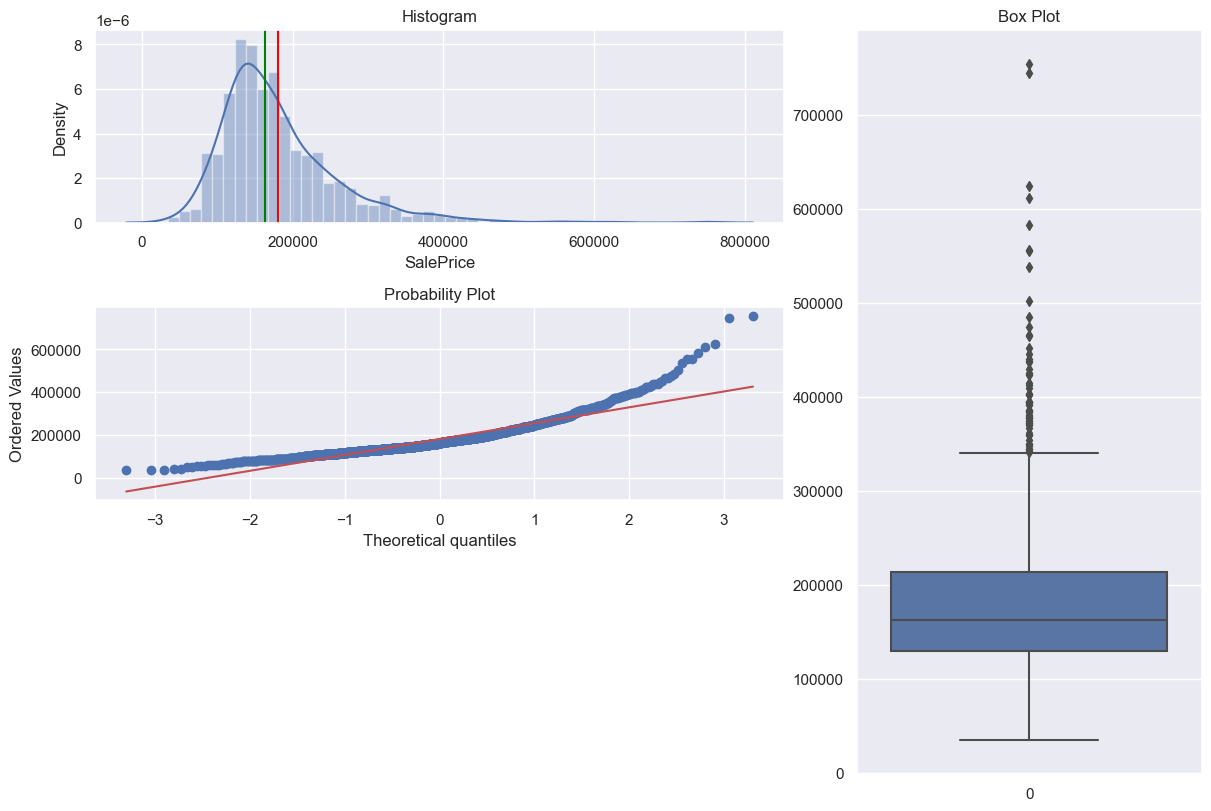

In [148]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(train, 'SalePrice')

####  Summary based on above plot: 

- The histogram plot of the SalePrice reveals a non-normal distribution with a right skew. The presence of a longer tail on the right side indicates that there are relatively higher-priced houses in the dataset.

- The boxplot highlights the presence of outliers in the SalePrice variable. The points outside the whiskers indicate data points that deviate significantly from the majority of the observations.

- The probability plot provides a comparison between the expected distribution of SalePrice if it were normally distributed (represented by the red line) and the actual distribution (represented by the blue points). We can observe substantial deviations from normality at both ends of the plot, indicating a departure from a perfectly normal distribution.

In [149]:
saleprice_skew = train['SalePrice'].skew()

print(f"Skewness of the SalesPrice is {saleprice_skew:.2f}")
saleprice_kurt = train['SalePrice'].kurt()

print(f"Kurtosis of the SalesPrice is {saleprice_kurt:.2f}")

Skewness of the SalesPrice is 1.88
Kurtosis of the SalesPrice is 6.54


#### Observations: 

- Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. 

- Here we can observe that the value of skewness is quite high which means that there is a large amount of asymmetry. 

- The peak of the histogram represents the mode i.e the price for which maximum number of houses were sold.

- As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is **Positively Skewed**. Most of the houses were sold less than the average price.

- A kurtosis value of 6.54 suggests that the 'SalesPrice' variable being analyzed has a distribution that is more peaked and has heavier tails than a normal distribution. 

- This indicates the presence of outliers or the influence of certain factors causing the distribution to deviate from a normal shape.

### Log Transformation

In [150]:
# Log Transformation on SalePrice
y_train = np.log1p(train["SalePrice"])
y_train = pd.DataFrame(y_train,columns=['SalePrice'])
y_train.head()

SalePrice
0  12.247699
1  12.109016
2  12.317171
3  11.849405
4  12.429220

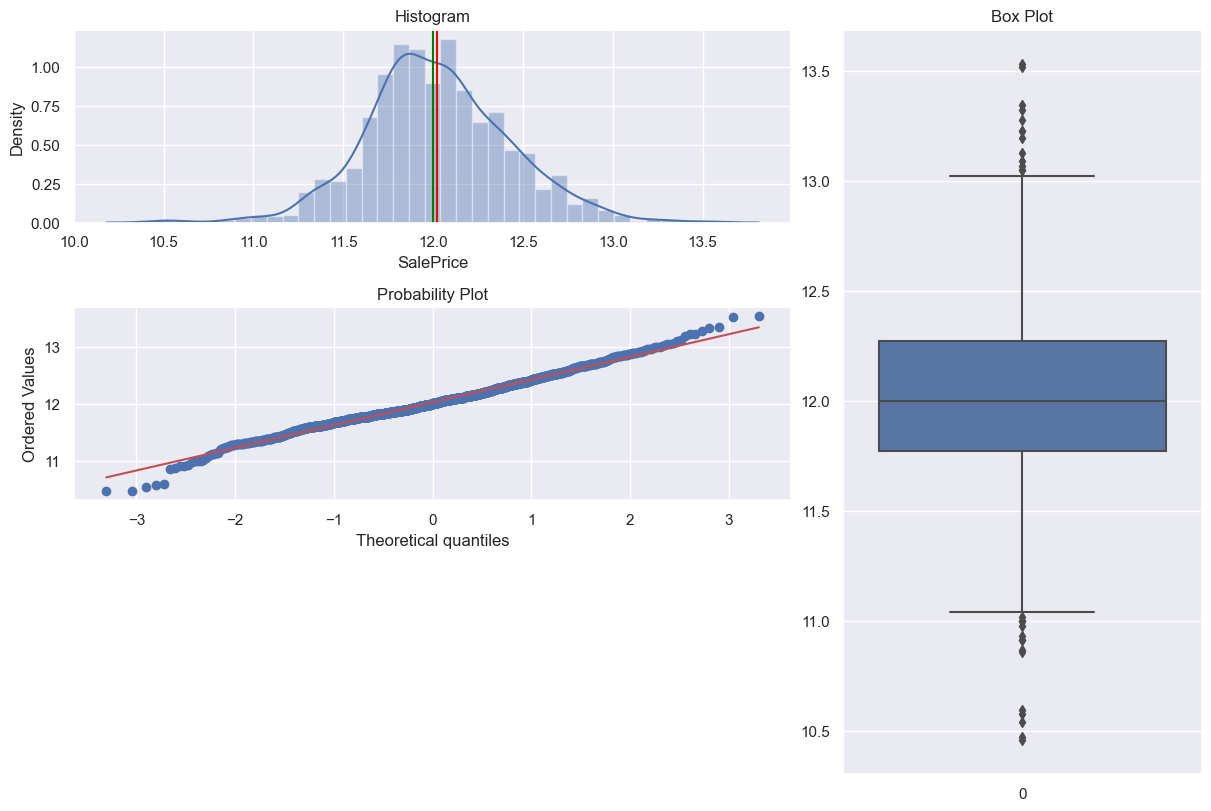

In [151]:
three_chart_plot(y_train, 'SalePrice')

### Missing Data/Null Values Analysis

In [152]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [153]:
null_frame_train = null_table(train)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values',ascending=False).head(10)

Columns  Count of Null Values  Approximate Percentage of Null Values
72        PoolQC                  1453                              99.520548
74   MiscFeature                  1406                              96.301370
6          Alley                  1369                              93.767123
73         Fence                  1179                              80.753425
57   FireplaceQu                   690                              47.260274
3    LotFrontage                   259                              17.739726
59   GarageYrBlt                    81                               5.547945
64    GarageCond                    81                               5.547945
58    GarageType                    81                               5.547945
60  GarageFinish                    81                               5.547945

In [154]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values',ascending=False).head(10)

Columns  Count of Null Values  Approximate Percentage of Null Values
72        PoolQC                  1456                              99.794380
74   MiscFeature                  1408                              96.504455
6          Alley                  1352                              92.666210
73         Fence                  1169                              80.123372
57   FireplaceQu                   730                              50.034270
3    LotFrontage                   227                              15.558602
59   GarageYrBlt                    78                               5.346127
63    GarageQual                    78                               5.346127
60  GarageFinish                    78                               5.346127
64    GarageCond                    78                               5.346127

#### Observations: 

- NA has a different meaning in this dataset. It is not necessarily indicative of missing data that needs to be imputed or removed.

- In several columns, such as 'Alley' and 'GarageType', the presence of NA actually represents a specific condition or feature of the house(whether present or not available as well). For example, NA in 'Alley' means the house has no alley access, and NA in 'GarageType' means the house has no garage. Similar patterns are observed in other columns as well.

- It is important to consider these NA values as they can have an impact on the final prices of the houses. Ignoring or removing these values could lead to biased or inaccurate predictions.

- One way to handle these NA values is to replace them appropriately with proper abbreviations or categories that reflect the corresponding columns. This ensures that the information about the absence of certain features is retained in the dataset.

- It is worth noting that the target variable 'SalePrice' does not have any null values, which means we have complete data for this variable.

**Let's combine both the train and test dataset and analyze the null values**

In [155]:
numtrain = train.shape[0]
numtest = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")

Total size is (2919, 80)


In [156]:
def miss_val_percent(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

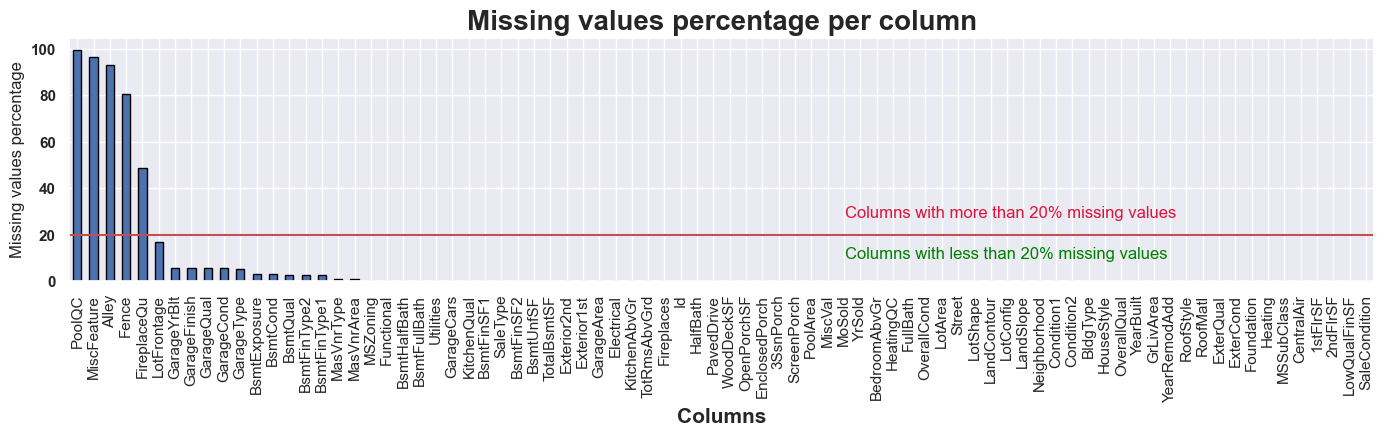

In [157]:
miss_val_percent(total, 20, color=sns.color_palette('Reds',15))

#### Observation: 

- There are 5 features having more than 20 percent null values. We can deal with these values appropriately by either replacing,imputing or dropping the rows/columns.

In [158]:
missing_data_count = total.isnull().sum()
missing_data_percent = total.isnull().sum() / len(total) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [159]:
len(missing_data)

34

In [160]:
missing_data.head(10)

Count    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071
GarageYrBlt     159   5.447071

There are 34 features that have missing values. I will divide them into three groups based on the data description:
   - **Group 1 - Categorical variables where `NA` means no feature:** `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType` (15 variables)
   
    For this group I will impute `NA` with `'None'`.
    
   - **Group 2 - Numerical variables where `NA` means no feature:** `GarageArea`, `GarageCars`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, `BsmtHalfBath`, `MasVnrArea` (10 variables)
   
    For this group I will impute `NA` with `0`.
    
   - **Group 3 - Other variables:** `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities`, `LotFrontage`, `GarageYrBlt` (9 variables)
        - I will impute `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities` with their *modes*,
        - impute `LotFrontage` with its *mean*,
        - impute `GarageYrBlt` with `YearBuilt`.

In [161]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
train[group_1] = train[group_1].fillna("None")
test[group_1] = test[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

train[group_2] = train[group_2].fillna(0)
test[group_2] = test[group_2].fillna(0)

# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
train[group_3a] = pd.DataFrame(imputer.fit_transform(train[group_3a]), index=train.index)
test[group_3a] = pd.DataFrame(imputer.fit_transform(test[group_3a]), index=test.index)



train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.mean())
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.mean())


train.GarageYrBlt = train.GarageYrBlt.fillna(train.YearBuilt)
test.GarageYrBlt = test.GarageYrBlt.fillna(test.YearBuilt)

**Need to Check if there is any missing value left:**

In [162]:
sum(train.isnull().sum())

0

In [163]:
#Find out missing values in test dataset.
test.isna().sum().sum()

0

**Milestone**:- All missing values have been handled as no null values in both train & test dataset

### Outlier Analysis for Independent Variables

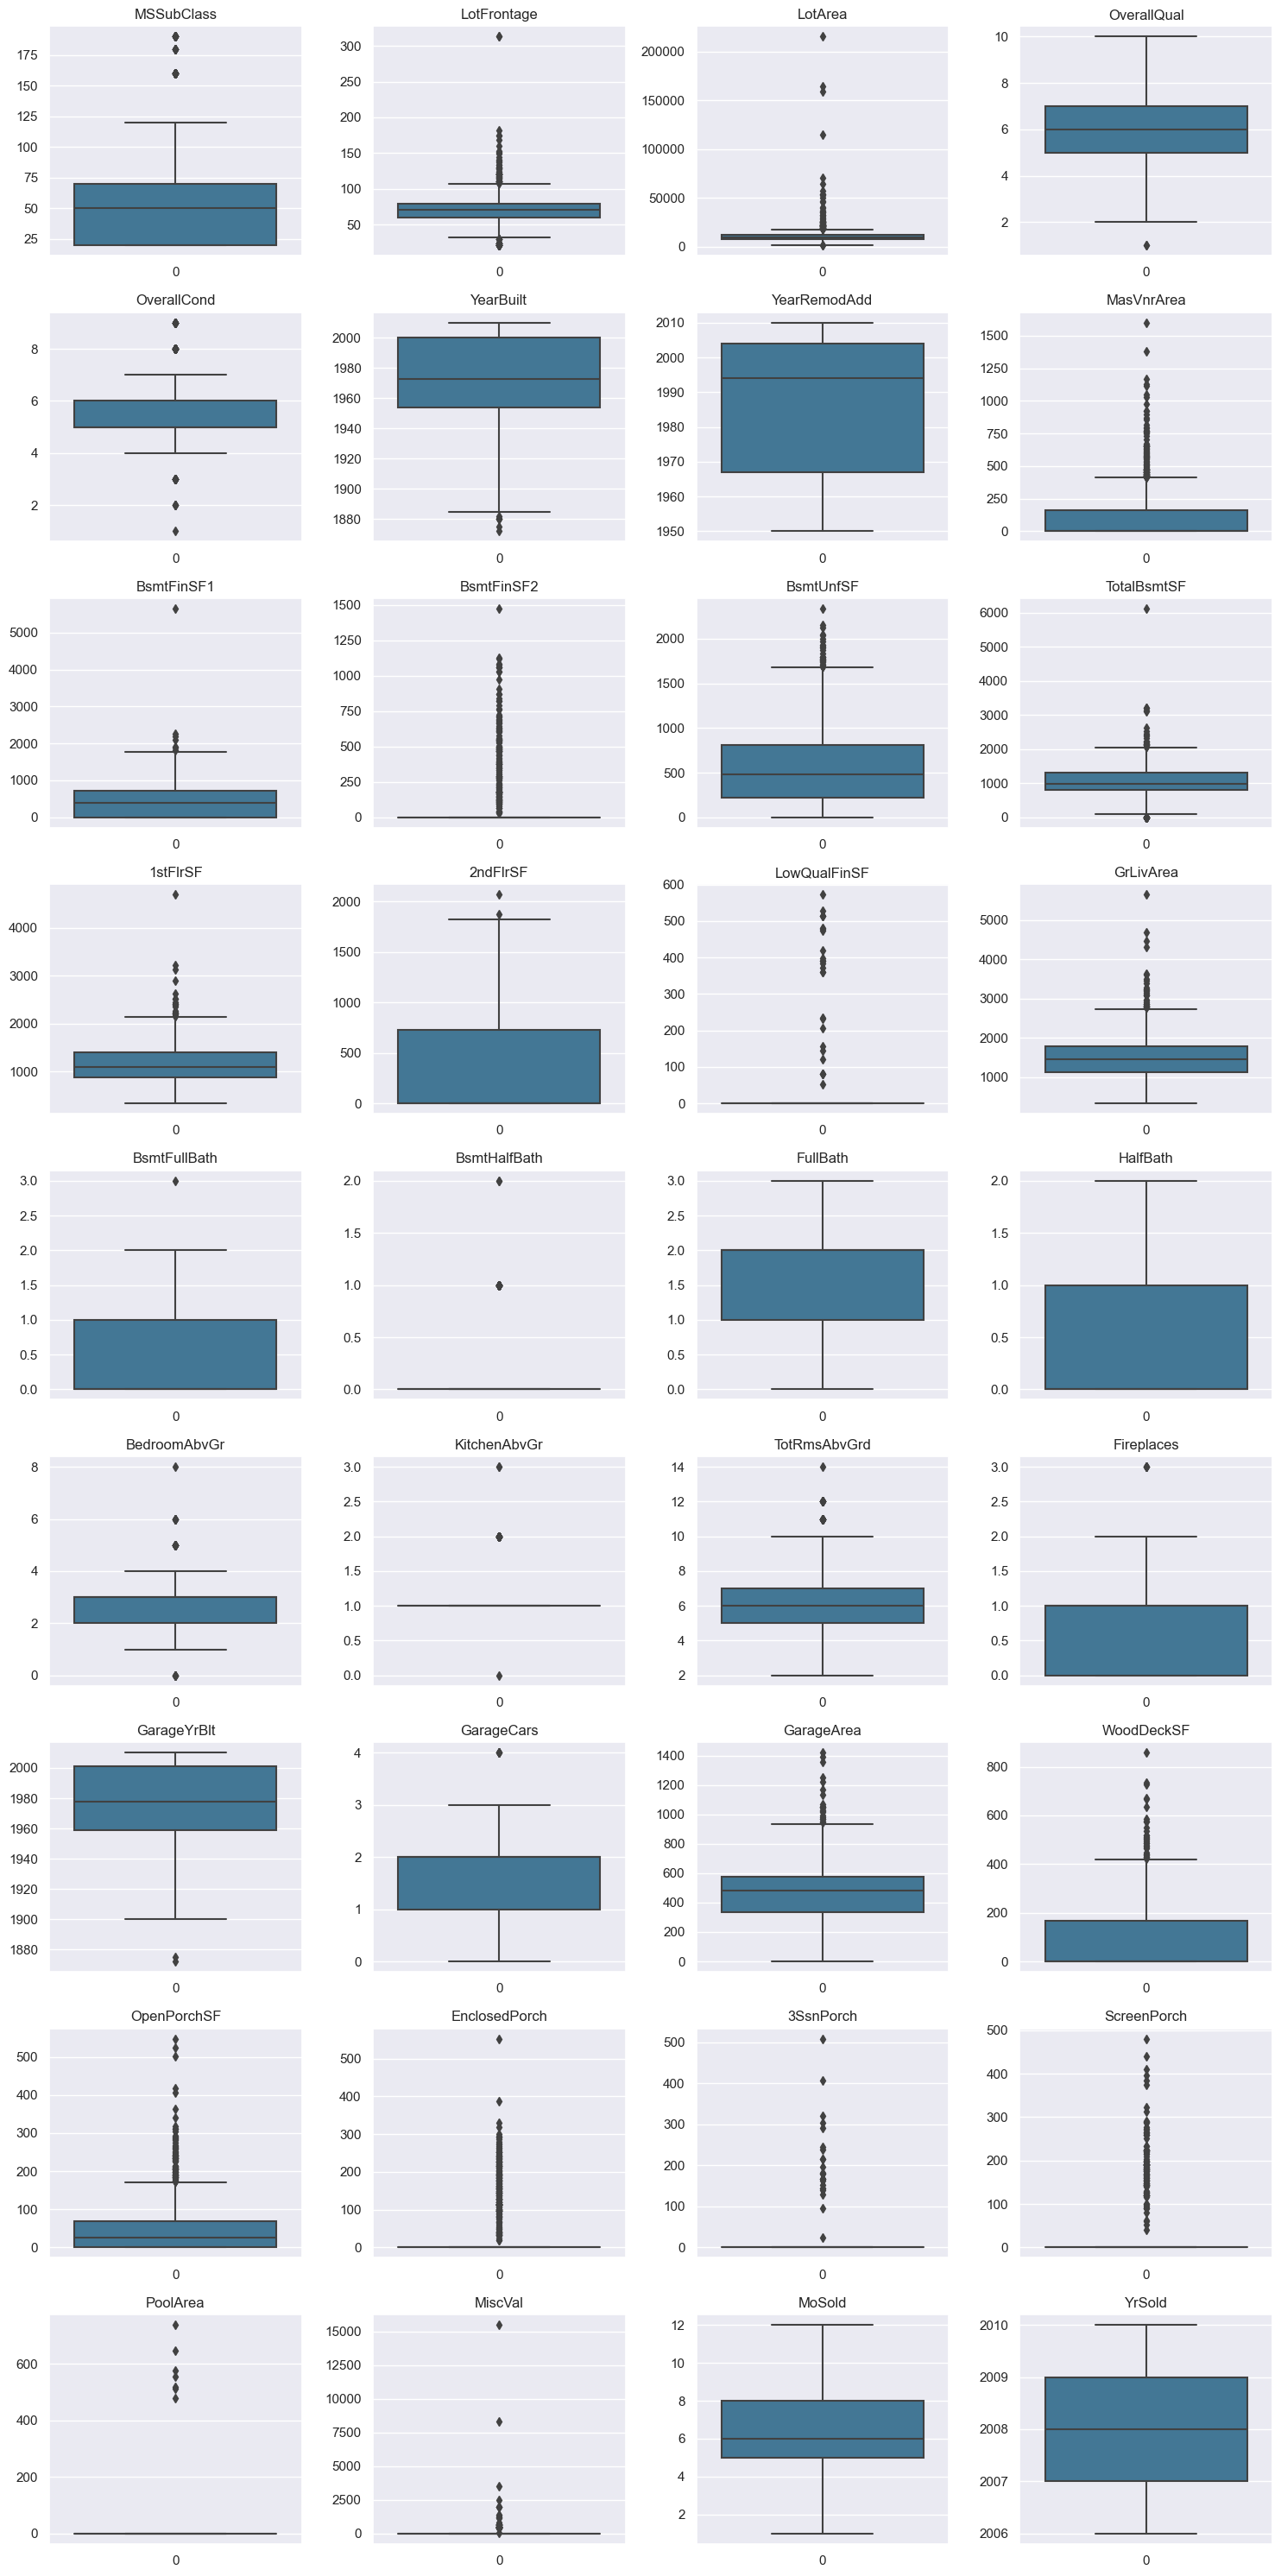

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find outliers for all numerical columns (before handling missing values)
numerical_df = train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id", "SalePrice"], axis=1)
num_plots = len(numerical_df.columns)

# Determine the number of rows and columns for subplots
num_rows = 9  # Number of rows for subplots
num_cols = 4  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the vertical and horizontal spacing between subplots

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Iterate over the columns and plot box plots
for i, column in enumerate(numerical_df.columns):
    ax = axes[i]
    sns.boxplot(numerical_df[column], orient='v', ax=ax,palette='mako')
    ax.set_title(column)  # Set the title of the subplot

# Hide unused subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap of subplots
plt.show()


#### Observation: 

- From the above box plots we can most of the columns are having outliers and some columns are having high zero values such as `PoolArea`,`MiscVal`,`BsmtHalfBath` and so on.

- For checking if the outliers are valid or invalid we need to analyse each of the variable and accordingly decide to keep or remove the outliers.

## GrLivArea

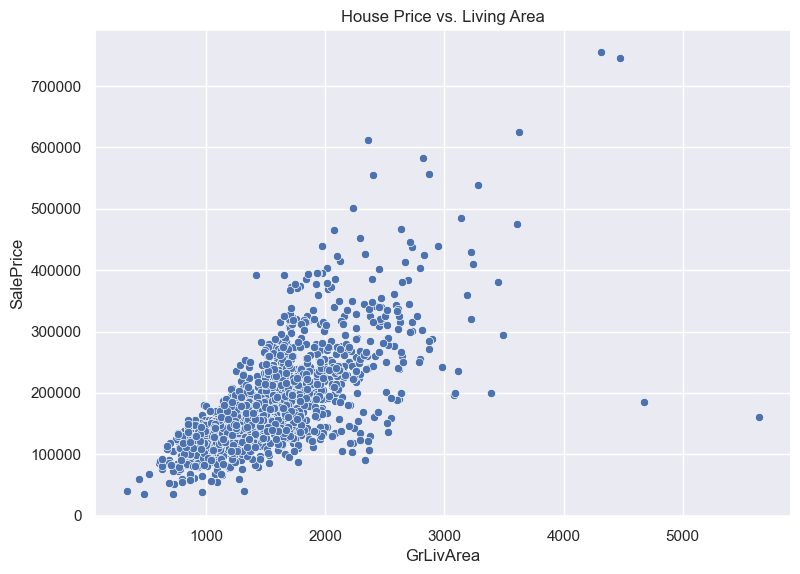

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
title = plt.title('House Price vs. Living Area')

There are two observations lying separately from the rest. They have large living area but low price. They are the outliers that we are looking for. I will delete them from the training set.

In [166]:
outlier_index = train[(train.GrLivArea > 4000) & (train.SalePrice < 200000)].index
train.drop(outlier_index, axis=0, inplace=True)
train.reset_index(inplace=True,drop=True)

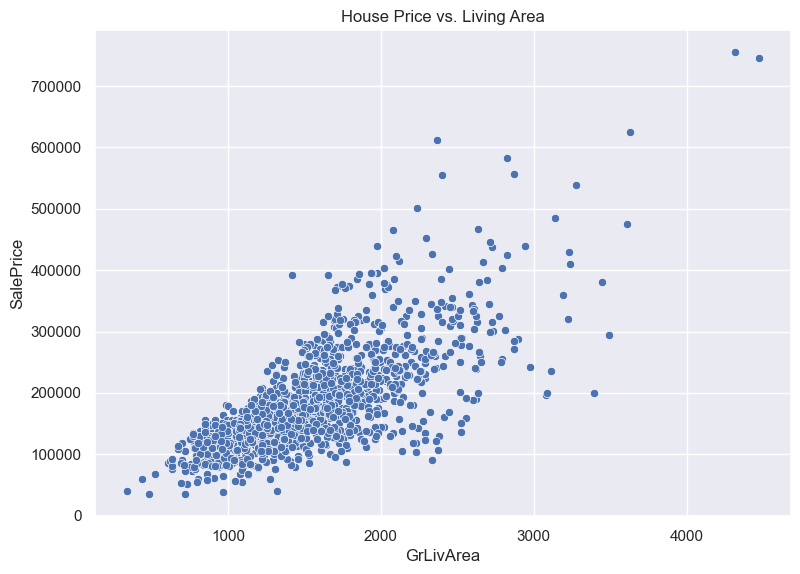

In [167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
title = plt.title('House Price vs. Living Area')

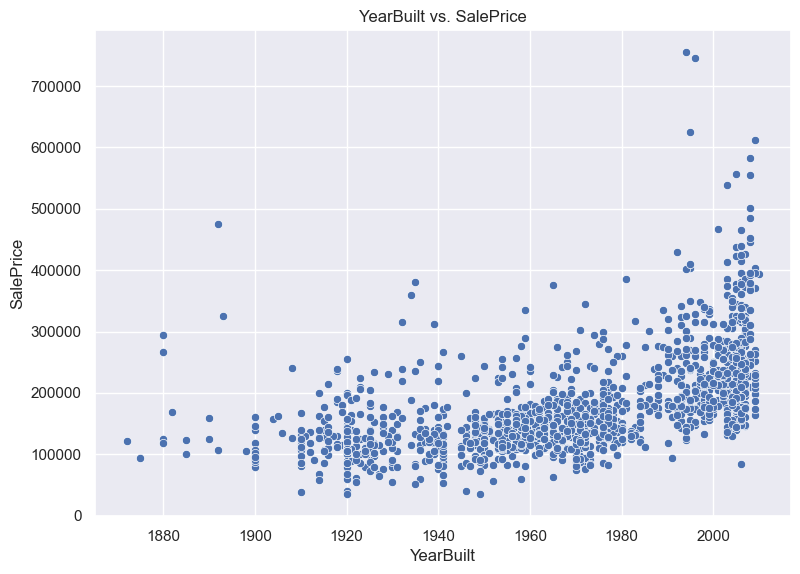

Correlation between YearBuilt and SalePrice: 0.52


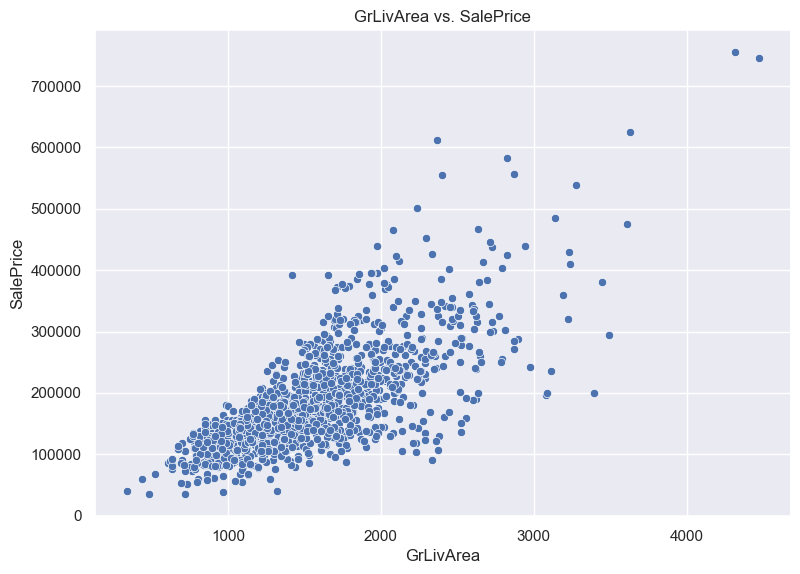

Correlation between GrLivArea and SalePrice: 0.73


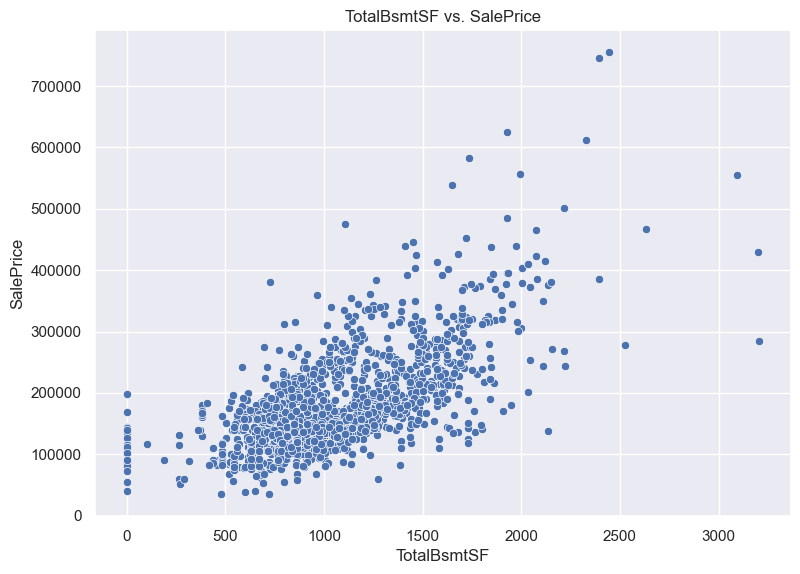

Correlation between TotalBsmtSF and SalePrice: 0.65


In [168]:
# Select three potential predictors
predictors = ['YearBuilt', 'GrLivArea', 'TotalBsmtSF']

# Scatter plots and correlations
for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train, x=predictor, y='SalePrice')
    plt.title(f'{predictor} vs. SalePrice')
    plt.xlabel(predictor)
    plt.ylabel('SalePrice')
    plt.show()
    
    correlation = train[predictor].corr(train['SalePrice'])
    print(f"Correlation between {predictor} and SalePrice: {correlation:.2f}")

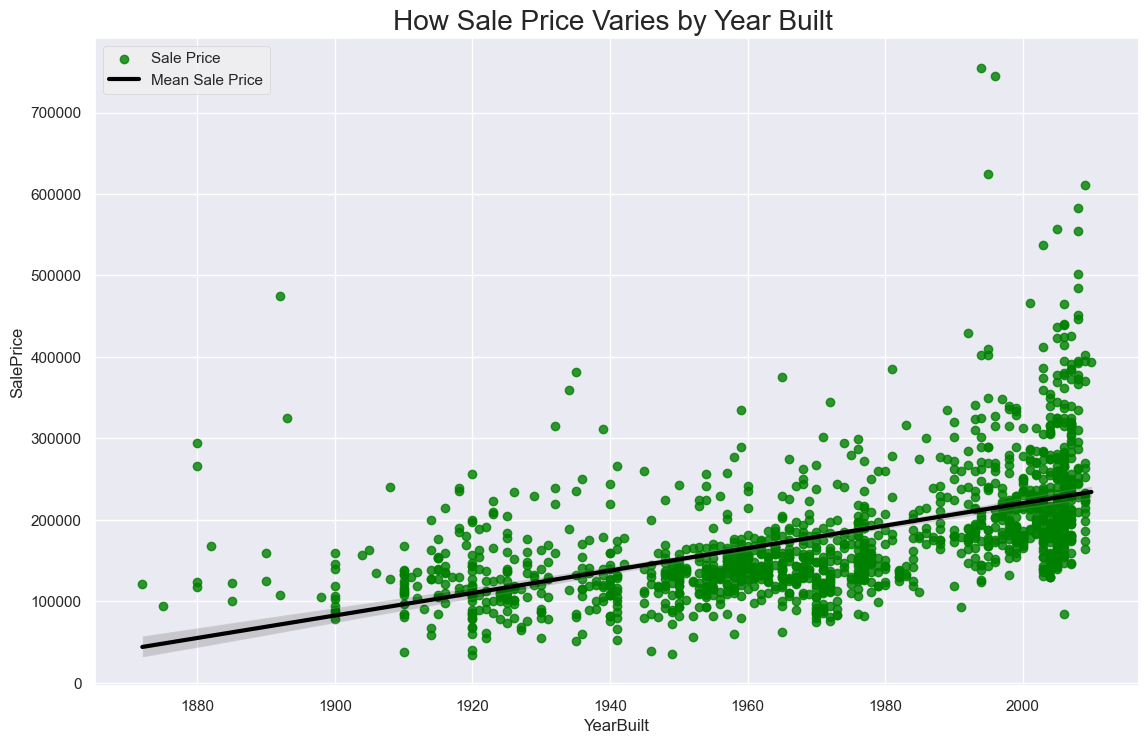

In [169]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=train, x='YearBuilt', y='SalePrice',scatter_kws={"color":"green"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by Year Built ")

# Add labels and title
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

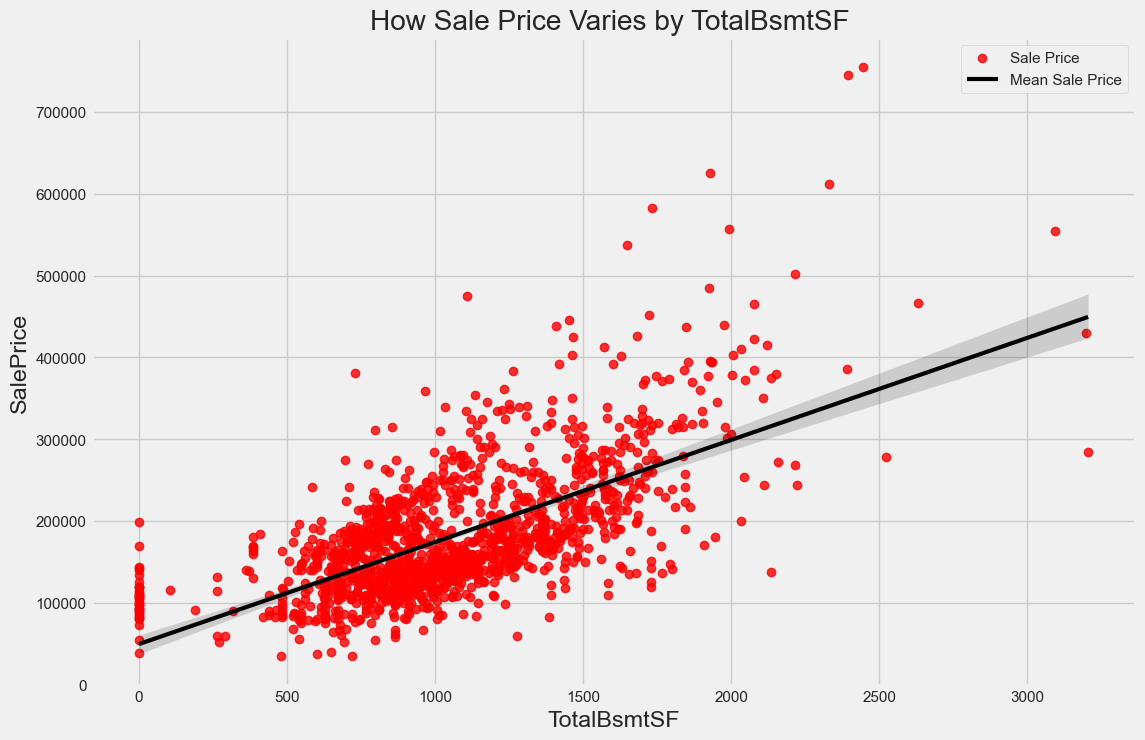

In [170]:
plt.figure(figsize=(12,8))
# Scatter plot
#sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', s=32)

# Regression line
sns.regplot(data=train, x='TotalBsmtSF', y='SalePrice',scatter_kws={"color":"red"},line_kws={"linewidth":3,"color":"black","label":"Mean Sale Price"},label="Sale Price")
plt.style.use("fivethirtyeight")
plt.title("How Sale Price Varies by TotalBsmtSF ")

# Add labels and title
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.legend()

# Display the plot
plt.show()

###  Potential Predictors

### Correlation with Numerical Features

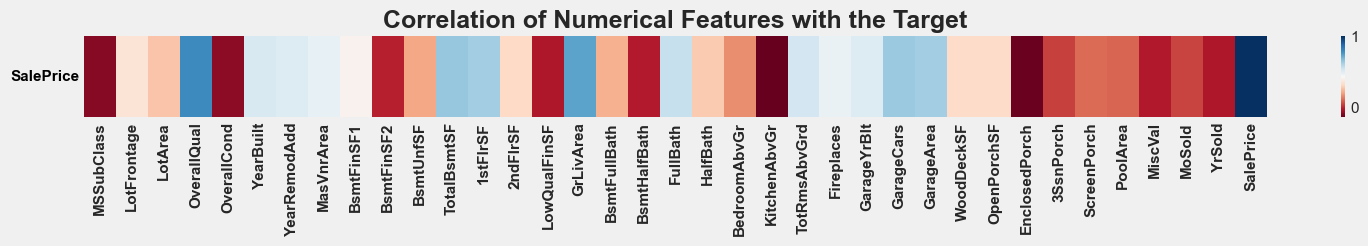

In [171]:
numerical_df = train.select_dtypes(exclude = 'object')
numerical_df = numerical_df.drop('Id', axis=1)

corr_num = numerical_df.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by='SalePrice', ascending=False).head(1), cmap='RdBu')

plt.title('Correlation of Numerical Features with the Target', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='black', rotation=0)



plt.show()

In [172]:
correlation = train.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

corr_house = correlation.style.background_gradient(cmap = cmap)

corr_house

#### Observation: 

- From the above table, we can conclude that __better the overall quality of the house, more will be the price of the house which is also true in real life and same is true for the living area i.e as the area increases, more will be the Sale Price.__

- __`OverallQual`,`GrLivArea`,`GarageCars`,`GarageArea` and `TotalBsmtSF` are the top 5 highly correlated features with the target variable of `SalePrice`__

#### OverallQual Vs Sale Price Analysis

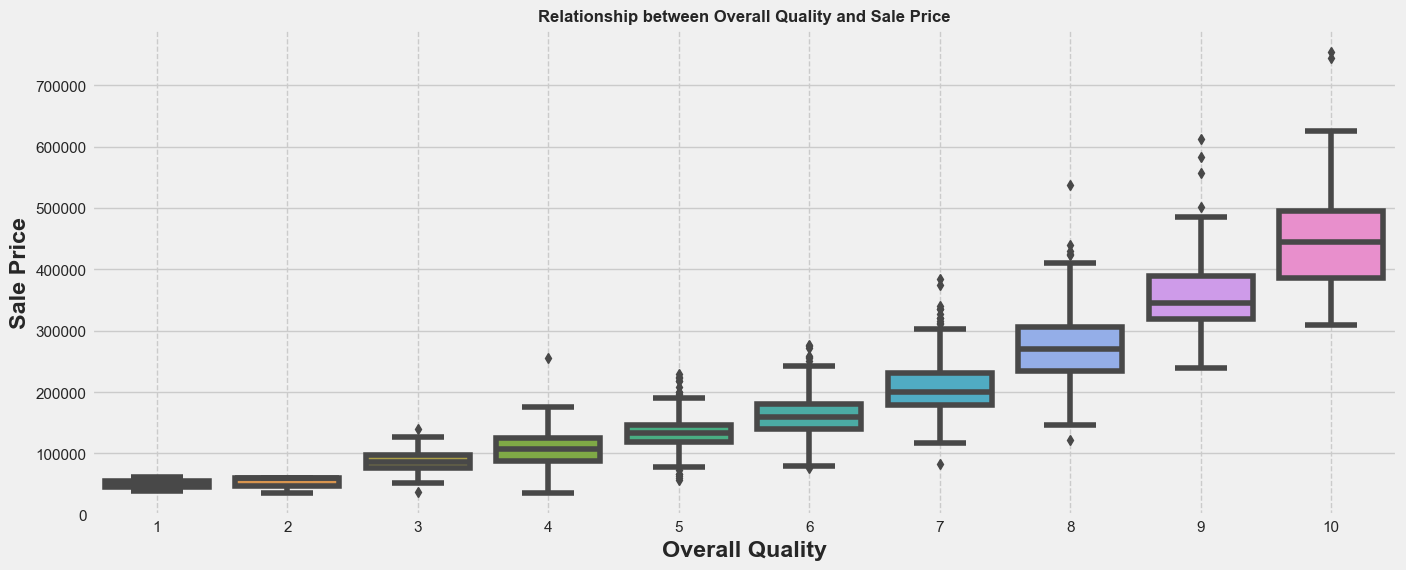

In [173]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=train, x='OverallQual', y='SalePrice')
plt.title('Relationship between Overall Quality and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xlabel('Overall Quality', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### GarageCars Vs Sale Price Analysis
Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garage.

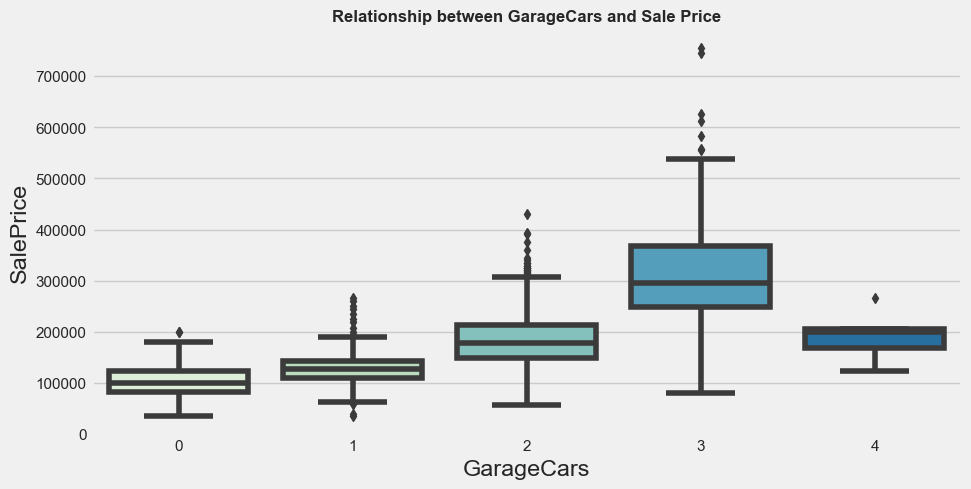

In [174]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='GarageCars', y='SalePrice', data=train, palette='GnBu')
title = plt.title('Relationship between GarageCars and Sale Price', weight = 'bold', fontsize = 12)

#### Year Built Vs Sale Price Analysis

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

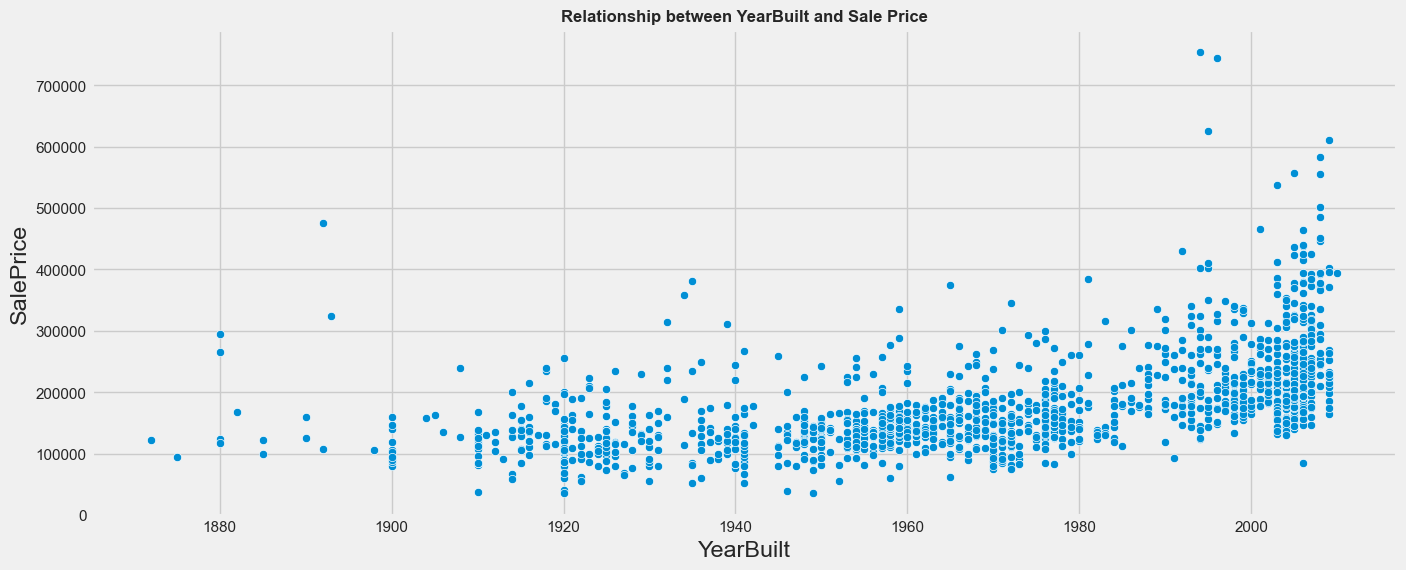

In [175]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)
title = plt.title('Relationship between YearBuilt and Sale Price', weight = 'bold', fontsize = 12)

### Categorical Feature Analysis

In [176]:
df_train = train.copy()

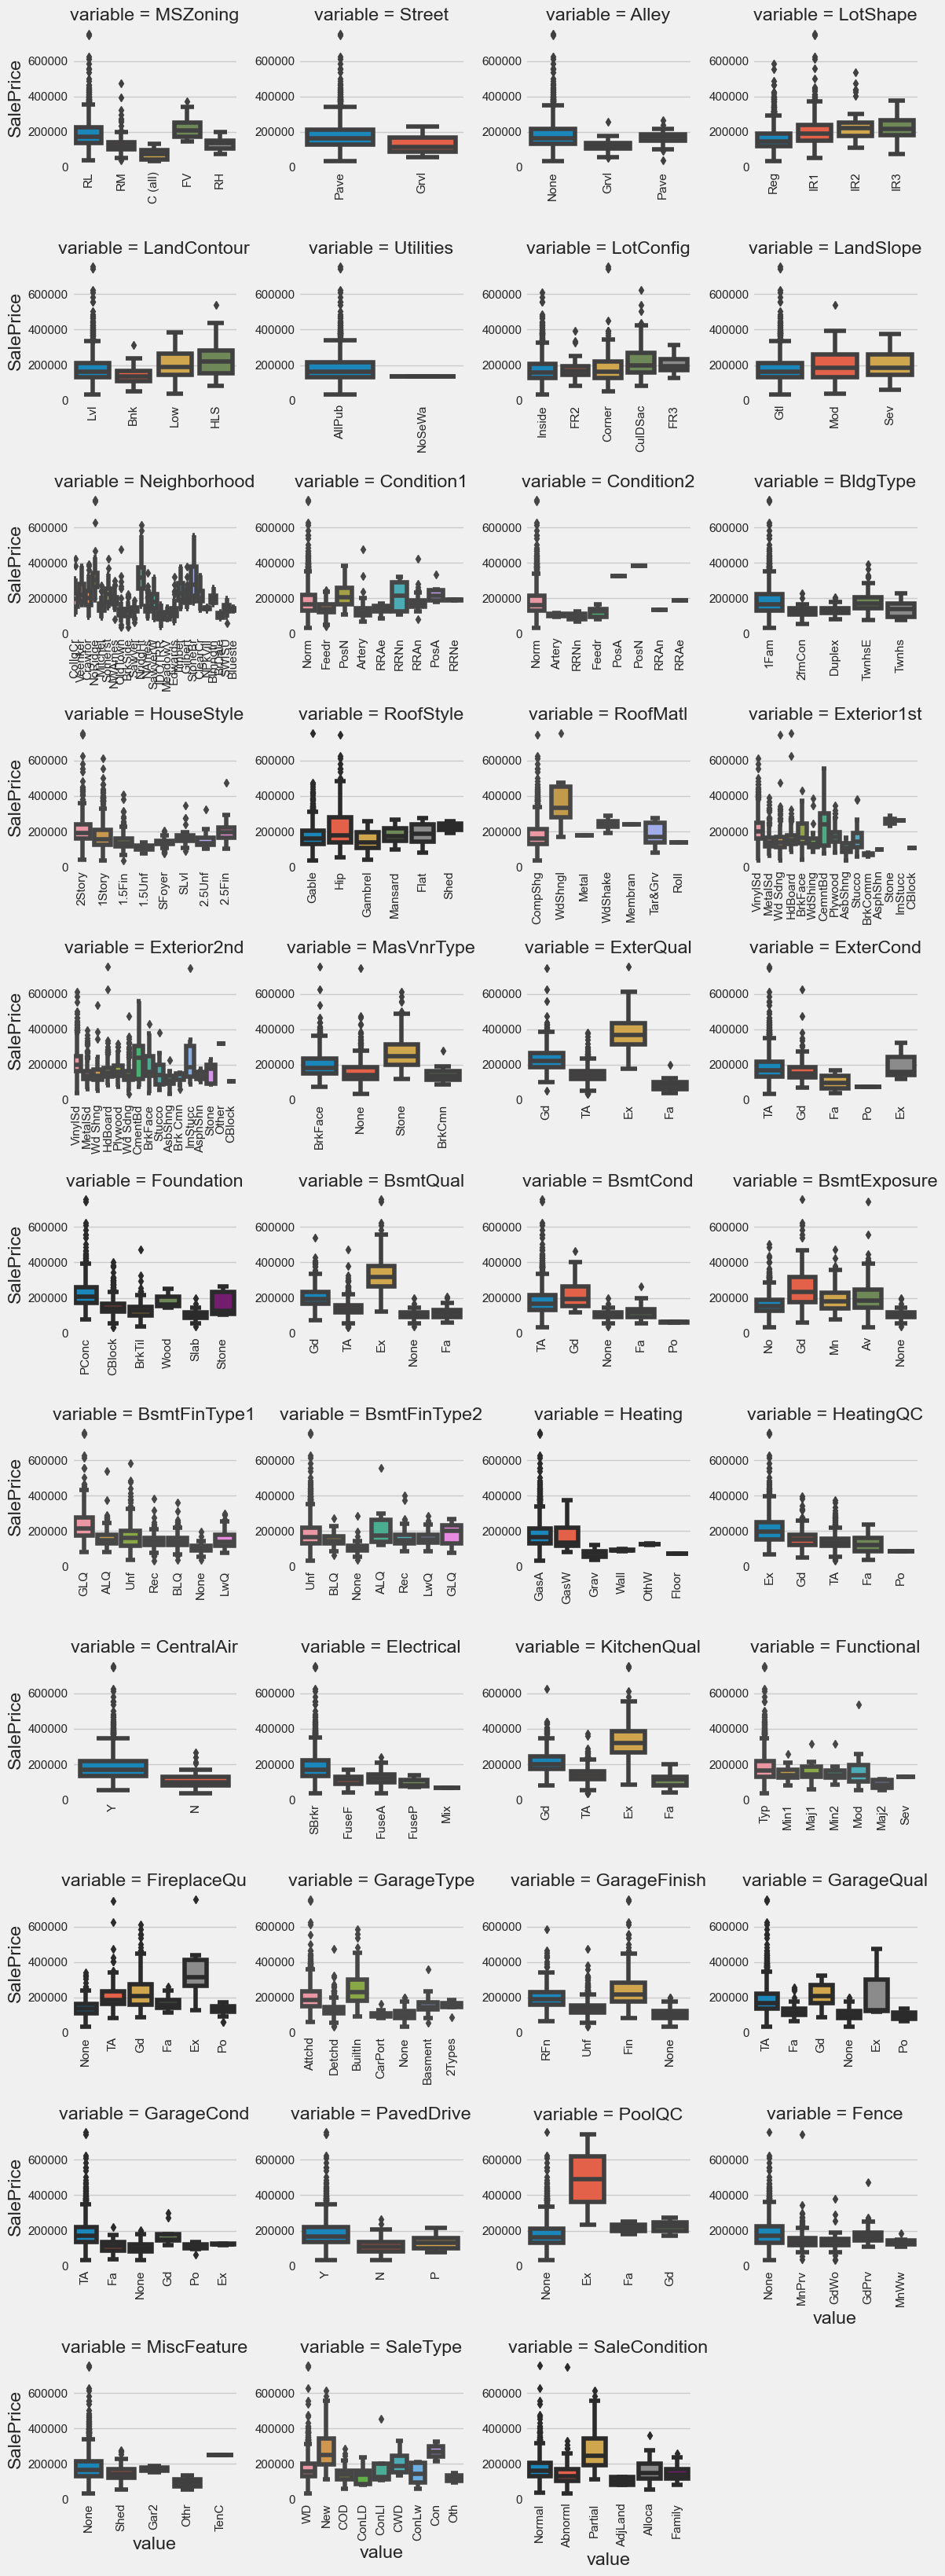

In [177]:
# for c in cat_list:
#     train[c] = train[c].astype('category')
#     if train[c].isnull().any():
#         train[c] = train[c].cat.add_categories(['MISSING'])
#         train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=cat_list)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

### Analysis of Variance (ANOVA) test on Categorical Features in relation to the 'SalePrice'

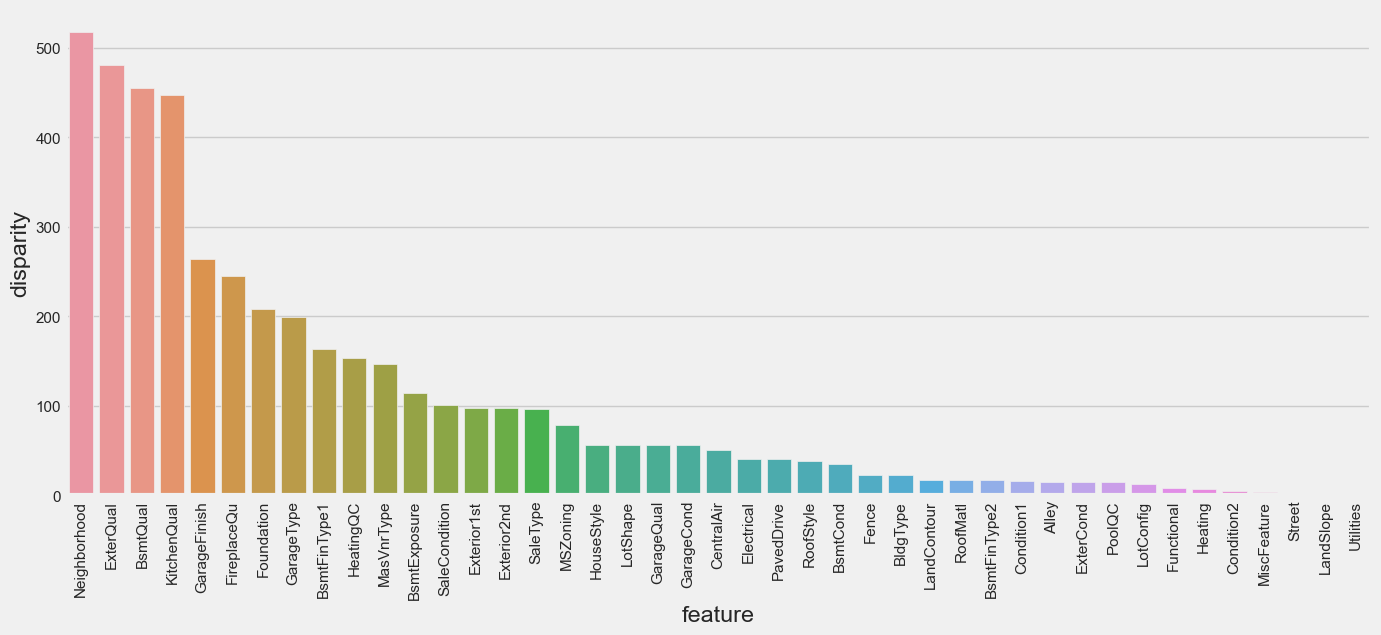

In [178]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_list
    pvals = []
    for c in cat_list:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

anova_results = anova(df_train)
anova_results['disparity'] = np.log(1./anova_results['pval'].values)
anova_results.reset_index(inplace=True,drop=True)
plt.figure(figsize = ((15, 6)))
sns.barplot(data=anova_results, x='feature', y='disparity')
x=plt.xticks(rotation=90)
plt.show()

In [179]:
anova_results.head()

feature           pval   disparity
0  Neighborhood  1.694312e-225  517.554369
1     ExterQual  1.610719e-209  480.763603
2      BsmtQual  1.127319e-198  455.792006
3   KitchenQual  3.872591e-195  447.650169
4  GarageFinish  3.149921e-115  263.649908

#### Observations: 

- The 'Neighborhood' feature has a very low p-value, indicating a strong association with the 'SalePrice'. The disparity value (517.64) suggests a significant difference in 'SalePrice' across different neighborhoods.

- Similarly, 'ExterQual', 'BsmtQual', 'KitchenQual', and 'GarageFinish' also have very low p-values, indicating significant associations with the 'SalePrice'.

- Features like 'GarageType', 'BsmtFinType1', 'HeatingQC', and 'MasVnrType' show relatively lower p-values, suggesting their influence on the 'SalePrice'.

- On the other hand, features like 'MiscFeature', 'Condition2', 'Street', 'LandSlope', and 'Utilities' have higher p-values, indicating a weaker association with the 'SalePrice'.

### Applying Encoding  to the Categorical Variables

In [180]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_En'] = o
    
cat_encoded = []
for q in cat_list:  
    encode(df_train, q)
    cat_encoded.append(q+'_En')
print(cat_encoded)

['MSZoning_En', 'Street_En', 'Alley_En', 'LotShape_En', 'LandContour_En', 'Utilities_En', 'LotConfig_En', 'LandSlope_En', 'Neighborhood_En', 'Condition1_En', 'Condition2_En', 'BldgType_En', 'HouseStyle_En', 'RoofStyle_En', 'RoofMatl_En', 'Exterior1st_En', 'Exterior2nd_En', 'MasVnrType_En', 'ExterQual_En', 'ExterCond_En', 'Foundation_En', 'BsmtQual_En', 'BsmtCond_En', 'BsmtExposure_En', 'BsmtFinType1_En', 'BsmtFinType2_En', 'Heating_En', 'HeatingQC_En', 'CentralAir_En', 'Electrical_En', 'KitchenQual_En', 'Functional_En', 'FireplaceQu_En', 'GarageType_En', 'GarageFinish_En', 'GarageQual_En', 'GarageCond_En', 'PavedDrive_En', 'PoolQC_En', 'Fence_En', 'MiscFeature_En', 'SaleType_En', 'SaleCondition_En']


In [181]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... GarageType_En GarageFinish_En GarageQual_En  \
0         Lvl    AllPub  ...           6.0             3.0           4.0   
1         Lvl    AllPub  ...           6.0             3.0           4.0   
2         Lvl    AllPub  ...           6.0             3.0           4.0   
3         Lvl    AllPub  ...           3.0             2.0           4.0   
4         Lvl    AllPub  ...           6.0             3.0           4.0   

  GarageCond_En PavedDrive_En PoolQC_En Fence_En  MiscFeature_En  SaleType_En  \
0           6.0           3.0       1.0      5.0             4.0          5.0   
1           6.0           3.0       1.0      5.0             4.0          5.0   
2           6.0           3.0       1.0      5.0             4.0          5.0   
3           6.0           3.0       1.0      5.0             4.0          5.0   
4           6.0           3.0       1.0      5.0             4.0          5.0   

   SaleCondition_En  
0               5.0  
1               5.0  
2               5.0  
3               2.0  
4               5.0  

[5 rows x 124 columns]

**New Encoded features of all categorical variables are added to train dataset**

In [182]:
df_test = test.copy()


def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_En'] = o

In [183]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  None      Reg   
1  1462          20       RL         81.0    14267   Pave  None      IR1   
2  1463          60       RL         74.0    13830   Pave  None      IR1   
3  1464          60       RL         78.0     9978   Pave  None      IR1   
4  1465         120       RL         43.0     5005   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0   None  MnPrv        None   
1         Lvl    AllPub  ...           0        0   None   None        Gar2   
2         Lvl    AllPub  ...           0        0   None  MnPrv        None   
3         Lvl    AllPub  ...           0        0   None   None        None   
4         HLS    AllPub  ...         144        0   None   None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [184]:
cat_encoded_test = []
for q in cat_list:  
    encode(df_test, q)
    cat_encoded_test.append(q+'_En')
print(cat_encoded)

['MSZoning_En', 'Street_En', 'Alley_En', 'LotShape_En', 'LandContour_En', 'Utilities_En', 'LotConfig_En', 'LandSlope_En', 'Neighborhood_En', 'Condition1_En', 'Condition2_En', 'BldgType_En', 'HouseStyle_En', 'RoofStyle_En', 'RoofMatl_En', 'Exterior1st_En', 'Exterior2nd_En', 'MasVnrType_En', 'ExterQual_En', 'ExterCond_En', 'Foundation_En', 'BsmtQual_En', 'BsmtCond_En', 'BsmtExposure_En', 'BsmtFinType1_En', 'BsmtFinType2_En', 'Heating_En', 'HeatingQC_En', 'CentralAir_En', 'Electrical_En', 'KitchenQual_En', 'Functional_En', 'FireplaceQu_En', 'GarageType_En', 'GarageFinish_En', 'GarageQual_En', 'GarageCond_En', 'PavedDrive_En', 'PoolQC_En', 'Fence_En', 'MiscFeature_En', 'SaleType_En', 'SaleCondition_En']


### Correlations analysis  with both Numerical and Categorical Features

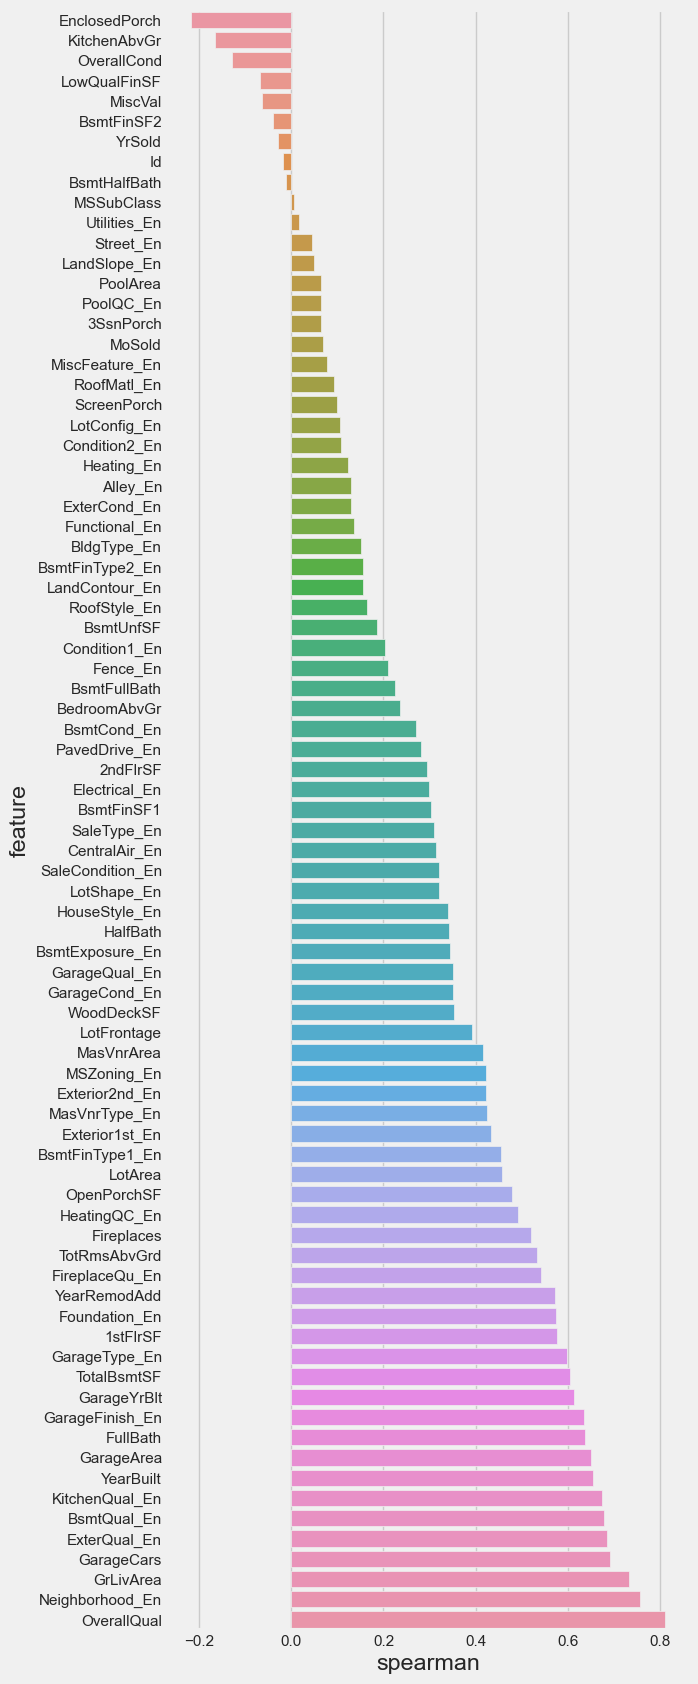

In [185]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = num_list + cat_encoded
spearman(df_train, features)

#### Observations: 

- Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. 

- __`OverallQual` is main criterion in establishing house price which was also observed with correlation with only numerical features.__ 

- __From the categorical columns,`Neighborhood` has big influence on Sale Price.__

- So the __top 3 potentially high influencing predictors are `OverallQual`, `Neighborhood` and `GrLivArea`.__

In [186]:
frame = df_train

spr = pd.DataFrame()
spr['feature'] = features
spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
spr = spr.sort_values('spearman',ascending=False)

In [187]:
spr.head(10)

feature  spearman
4       OverallQual  0.811082
45  Neighborhood_En  0.757141
16        GrLivArea  0.732342
26       GarageCars  0.690974
55     ExterQual_En  0.685228
58      BsmtQual_En  0.678946
67   KitchenQual_En  0.673825
6         YearBuilt  0.653422
27       GarageArea  0.650284
19         FullBath  0.636262

#### Neighborhood Vs Sale Price Analysis

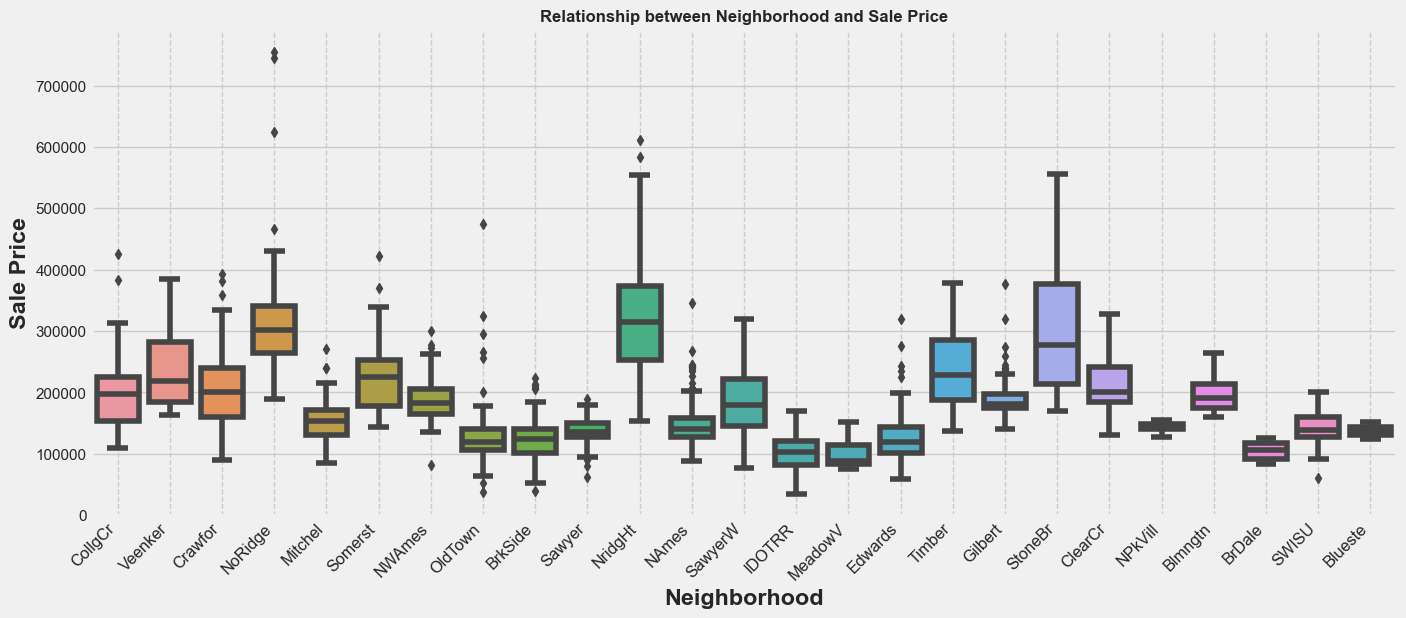

In [188]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice')
plt.title('Relationship between Neighborhood and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='small')
plt.xlabel('Neighborhood', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Observations: 

- From the above boxplot we can observe high variability in Sale Price mostly across all the Neighborhood categories.

#### ExterQual Vs Sale Price Analysis

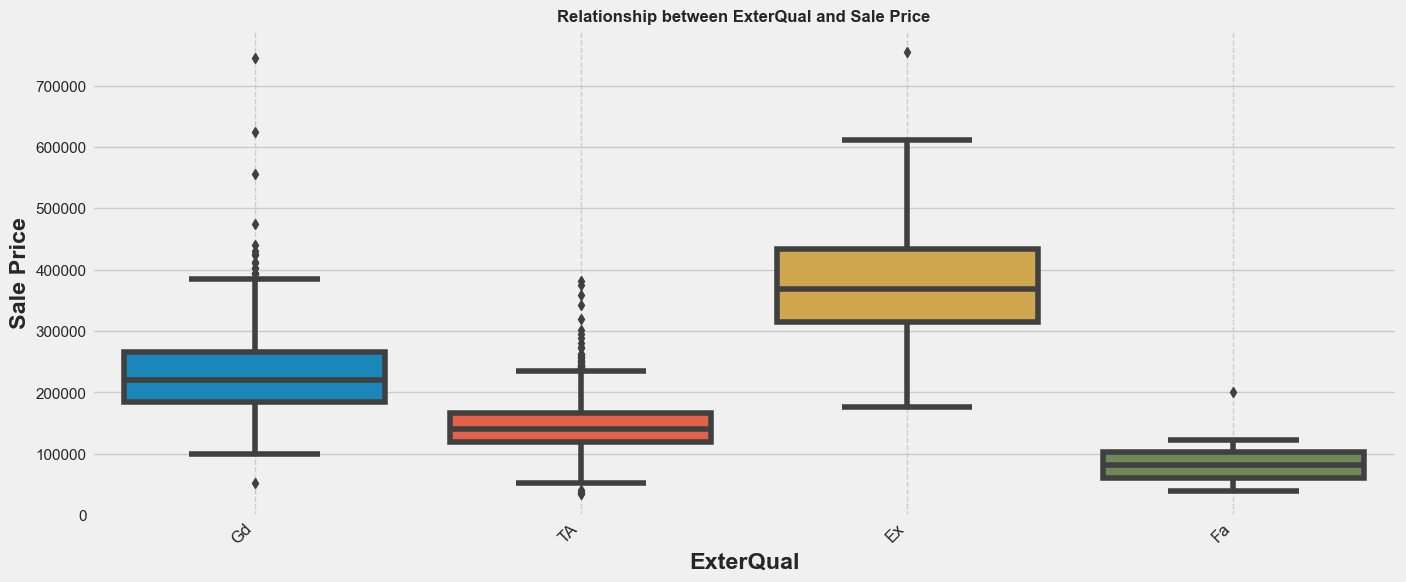

In [189]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=train, x='ExterQual', y='SalePrice')
plt.title('Relationship between ExterQual and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='small')
plt.xlabel('ExterQual', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### BsmtQual Vs Sale Price Analysis

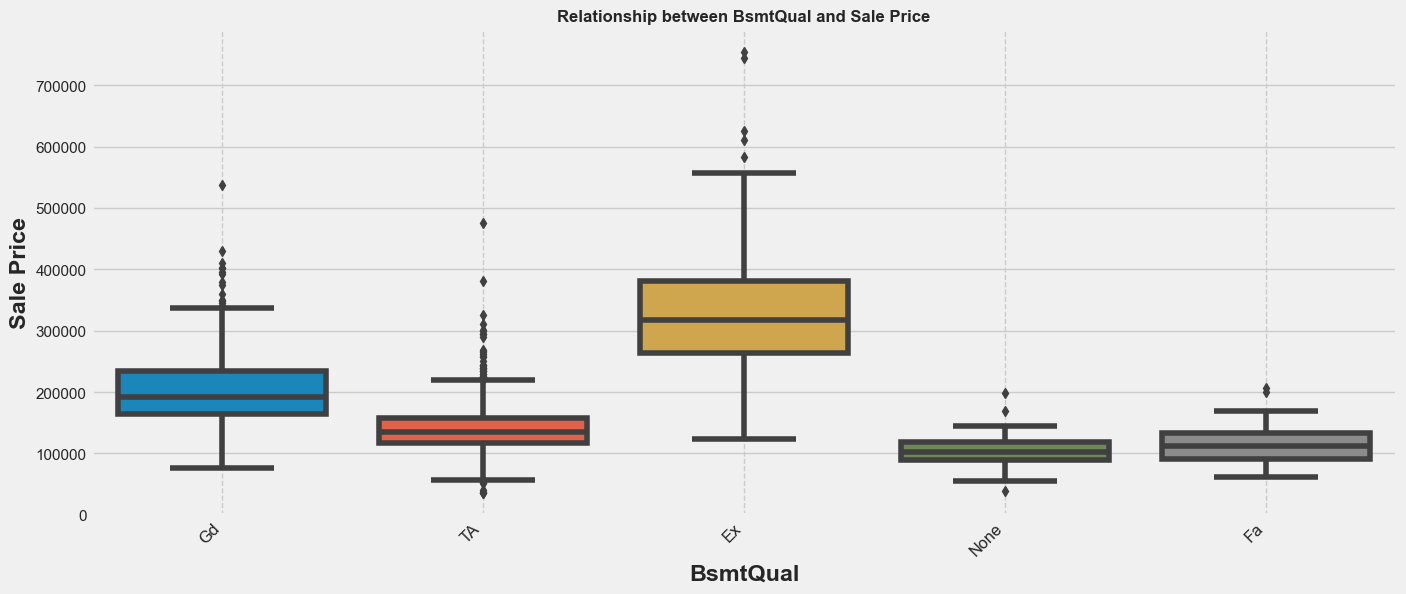

In [190]:
plt.figure(figsize=((15, 6)))
sns.boxplot(data=train, x='BsmtQual', y='SalePrice')
plt.title('Relationship between BsmtQual and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='small')
plt.xlabel('BsmtQual', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Observations: 

- From the above boxplot we can observe variation in Sale Price across all the BsmtQual categories.

### Pairplots

**Comparison of  sale price  to each of the top 10 highly correlated independent variables**

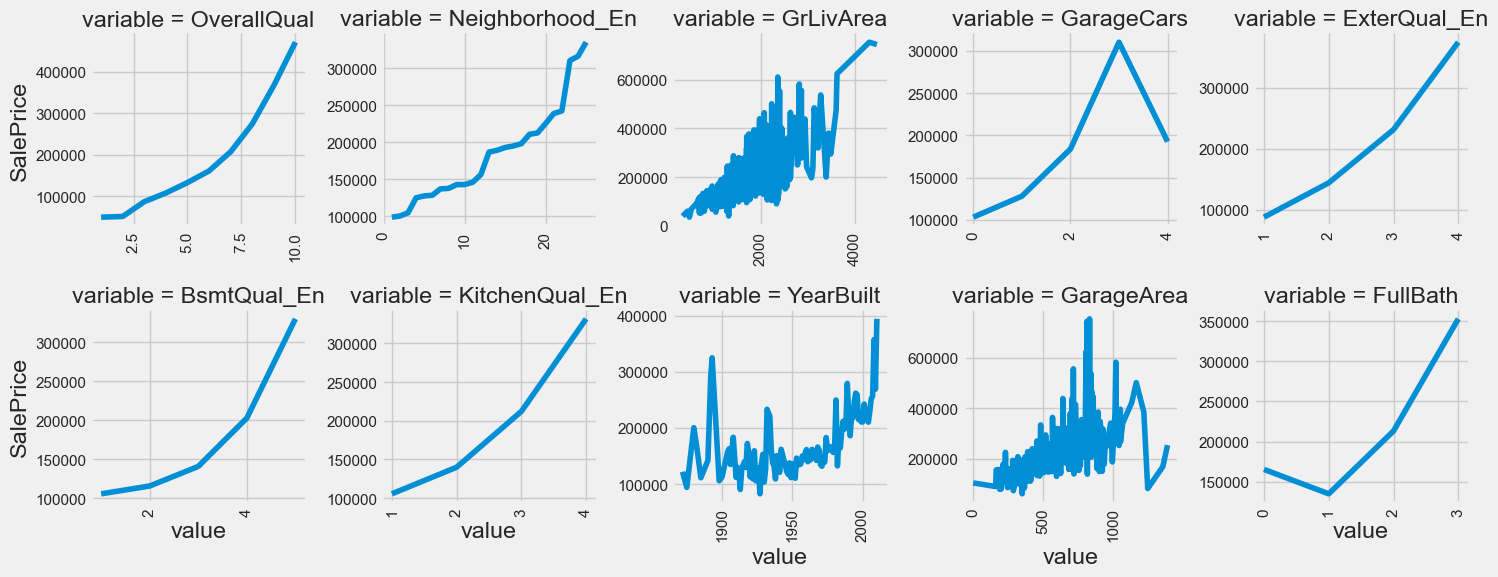

In [191]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
top_10 = ['OverallQual', 'Neighborhood_En', 'GrLivArea', 'GarageCars', 'ExterQual_En', 'BsmtQual_En', 'KitchenQual_En', 'YearBuilt', 'GarageArea', 'FullBath']   
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=top_10)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(pairplot, "value", "SalePrice")

#### Observations: 

- From the above pairplots, most of top features observe to be having kind off increasing trend.

### Linear Regression Assumption

Before we move forward we need to understand the assumptions of linear regression:
* Linearity
* Homoscedasticity
* No or little Multicollinearity
* Independence of Error

Since we fit a linear model, we assume that the relationship is linear, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the dependent variable doesn't increase as the value of the independent increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

In order to discover the linearity let's plot scatter plots for GrLivArea and MasVnrArea

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

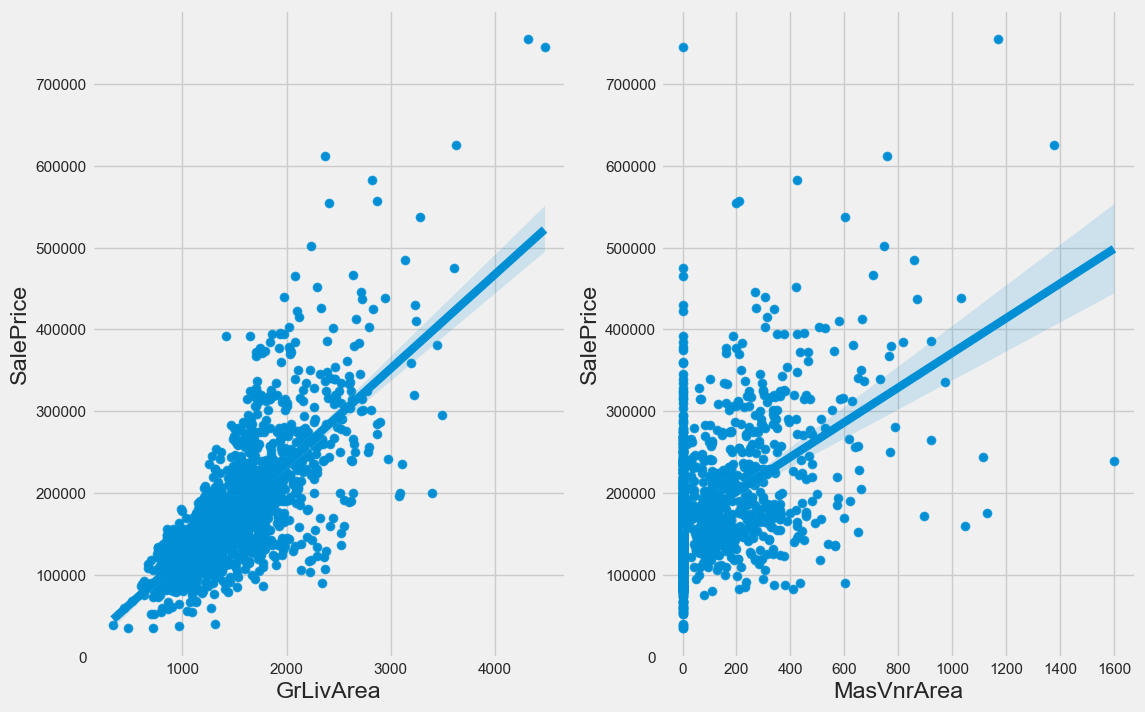

In [192]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'], ax = ax1)

sns.scatterplot(x = train['MasVnrArea'],y = train['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = train['MasVnrArea'], y = train['SalePrice'], ax=ax2)

We can observe that the relationship between Sales Price and GrLivArea is much more linear than the relationship between Sales Price and MasVnrArea.


Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice. 

A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. We can think of the lines as averages; a few data points will fit the line and others will miss. 
- A residual plot has the Residual Values on the vertical axis; 
- the horizontal axis displays the independent variable.

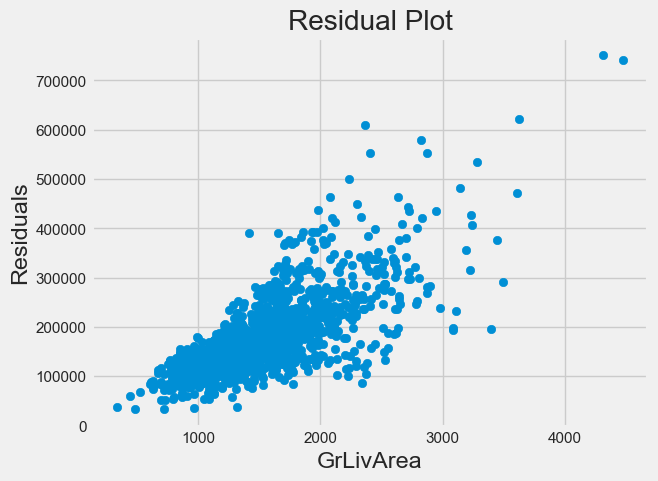

In [193]:
import matplotlib.pyplot as plt
df = train.copy()
# Calculate the residuals
residuals = df['SalePrice'] - df['GrLivArea']

# Create a scatter plot of residuals
plt.scatter(df['GrLivArea'], residuals)

# Add labels and title
plt.xlabel('GrLivArea')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. 

The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. 

Let's plot the three graphs again for the target feature.

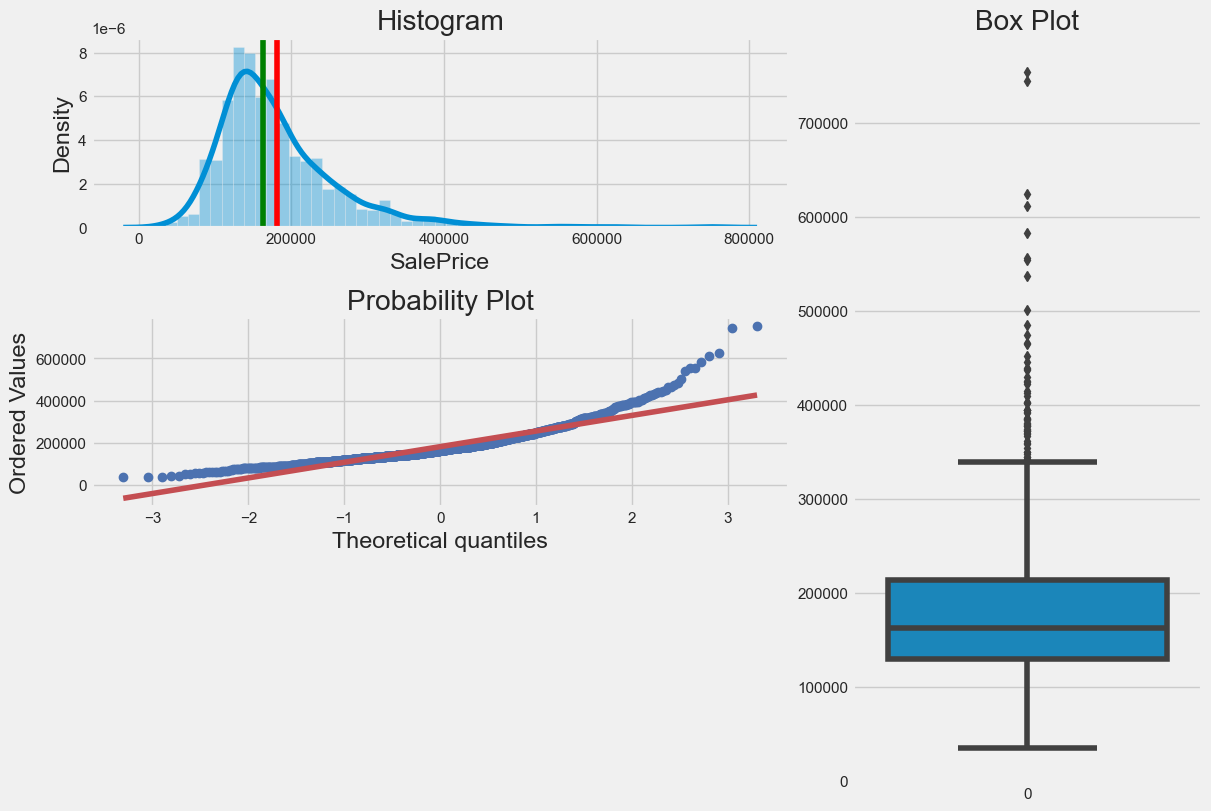

In [194]:
three_chart_plot(df, 'SalePrice')

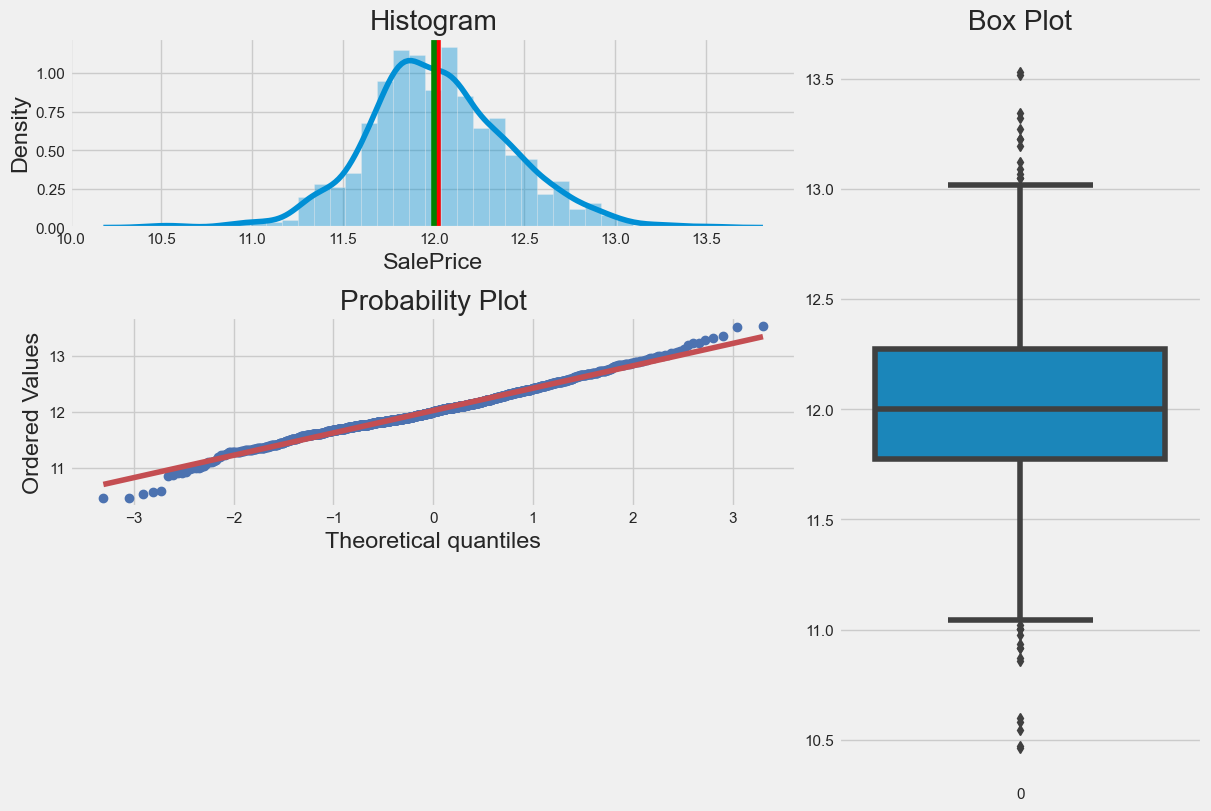

In [195]:
df["SalePrice"] = np.log1p(df["SalePrice"])
three_chart_plot(df, 'SalePrice')

We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

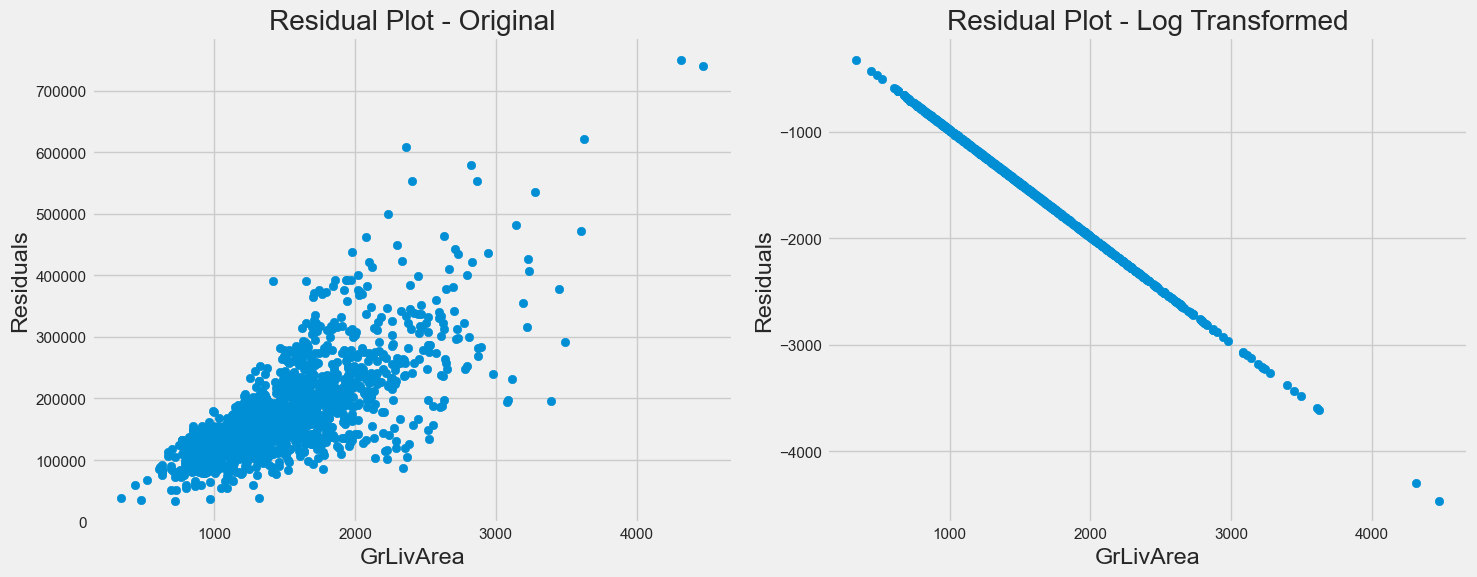

In [196]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2, sharey=False, sharex=False)

# Calculate the residuals for the first plot
residuals1 =train['SalePrice'] - train['GrLivArea']

# Create the scatter plot for the first plot
ax1.scatter(train['GrLivArea'], residuals1)

# Set labels and title for the first plot
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Plot - Original')

# Calculate the residuals for the second plot
residuals2 = df['SalePrice'] - df['GrLivArea']

# Create the scatter plot for the second plot
ax2.scatter(df['GrLivArea'], residuals2)

# Set labels and title for the second plot
ax2.set_xlabel('GrLivArea')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot - Log Transformed')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


- Linear Regression indicates significant relationships between the dependent variable and the independent variable. It assumes that there is a linear relationship between the independent variables and the dependent variable but this is not always the case in real life. There are very less scenarios where this assumption holds true. Multiple Regression also suffers from multi-collinearity, auto-correlation, and heteroskedasticity.

- The interpretation of the linear coefficient is that it represents the mean change in the dependent variable for 1 unit change in the independent variable when all the other independent variables are held constant.

Now suppose that there are two correlated independent variables (A and B) and we are aiming to find the right coefficient for these independent variables. When the coefficient for A is calculated, will that coefficient be accurate? No, it won’t be right because changes in A are associated with shifts in B, and as we have already discussed that all the other variables need to be held constant, B can’t be held as a constant because A and B are correlated. This is known as Multicollinearity and it is one of the disadvantages of Linear Regression.

In order to solve this problem, we use various regularization techniques (l1, l2 etc) or other kind of regression techniques like Elastic Net Regression, Lasso and Ridge Regression which automatically takes care of multicollinearity.

In [197]:
train_data = df_train.select_dtypes(exclude = 'category')
del train_data['Id']

In [198]:
test_data = df_test.select_dtypes(exclude = 'object')
del test_data['Id']

In [199]:
train_data.shape,test_data.shape

((1458, 123), (1459, 79))

### Feature Selections for the Models


In [200]:
def plot_correlation_heatmap(data, column_names):
    # Create correlation matrix from data excluding the last column
    corr_mat = data[column_names].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_mat,
                annot=True,
                fmt='.1f',
                cmap='GnBu',
                vmin=0.5,
                vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

### Top 5 Highly Correlated Numerical Features

In [201]:
top5_num_feature = ['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','1stFlrSF']

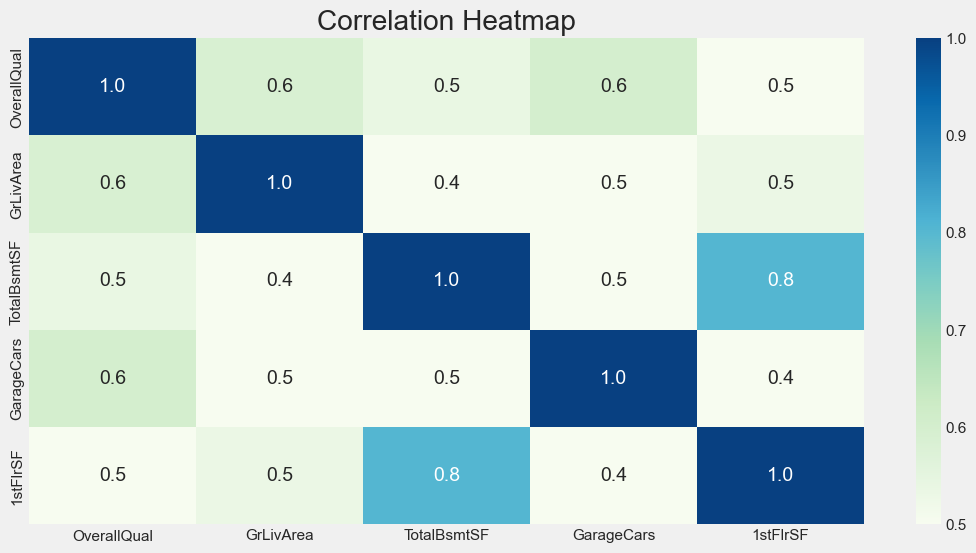

In [202]:
plot_correlation_heatmap(train_data, top5_num_feature)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


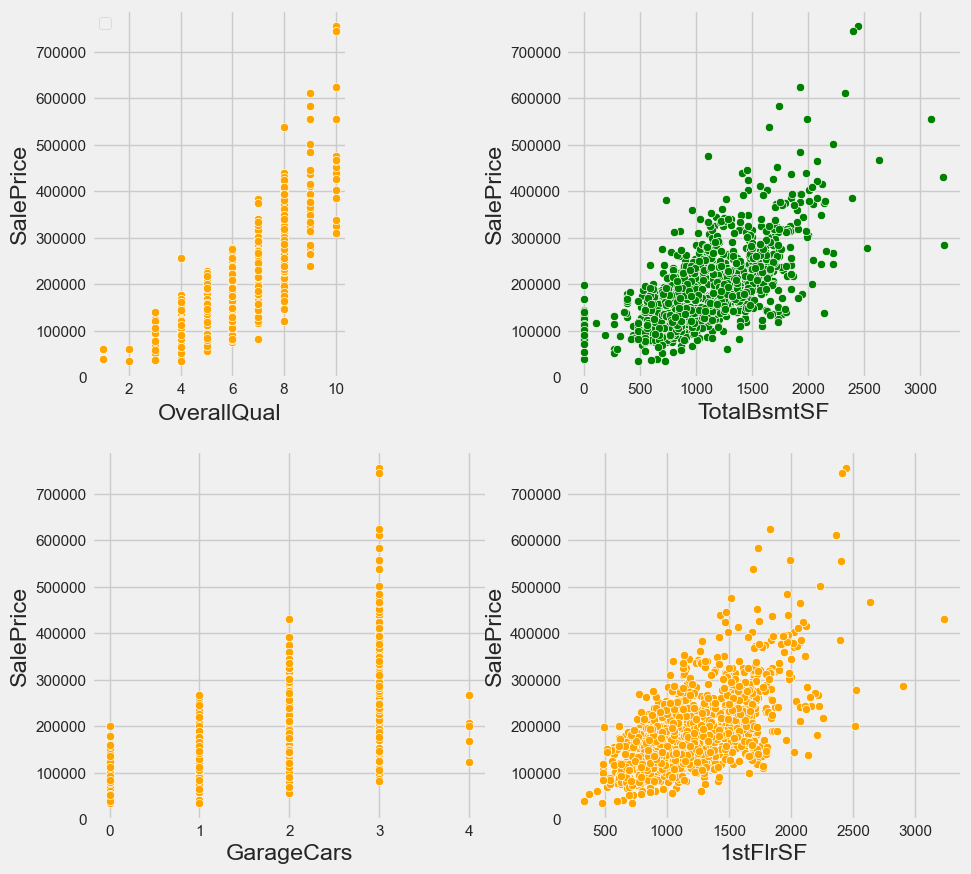

In [230]:
## Scatterplots
plt.figure(figsize=(10,10))
features_to_examine = ['GrLivArea','TotalBsmtSF','GarageCars','1stFlrSF']
plt.subplot(2,2,1)
sns.scatterplot(data=train_data,x='GrLivArea',y='SalePrice',color='blue')
plt.subplot(2,2,2)
sns.scatterplot(data=train_data,x='TotalBsmtSF',y='SalePrice',color='green')
plt.subplot(2,2,3)
sns.scatterplot(data=train_data,x='GarageCars',y='SalePrice',color='orange')
plt.subplot(2,2,4)
sns.scatterplot(data=train_data,x='1stFlrSF',y='SalePrice',color='orange')
plt.subplot(2,3,1)
sns.scatterplot(data=train_data,x='OverallQual',y='SalePrice',color='orange')
plt.legend()

### Top 5 Highly Correlated Categorical Features

In [203]:
top5_cat_feature = ['Neighborhood_En','ExterQual_En','BsmtQual_En','KitchenQual_En','GarageFinish_En']

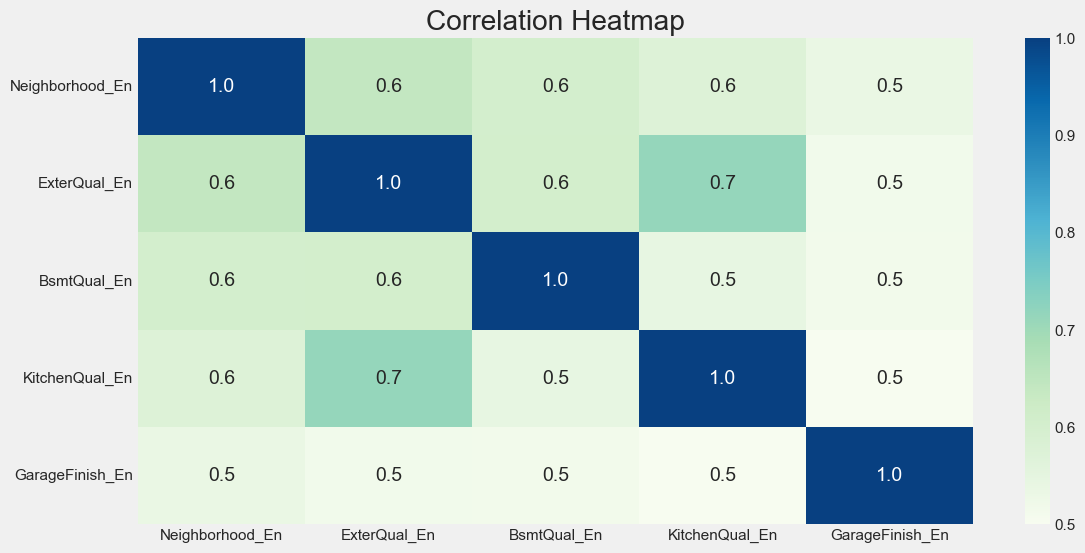

In [204]:
plot_correlation_heatmap(train_data, top5_cat_feature)

### Top 10 Highly Correlated Categorical Features

In [205]:
# Sort the dataframe by the "spearman" column in descending order and select the top 10 rows
top_ten_features = spr.sort_values(by='spearman', ascending=False).head(10)
# Extract the features and store them in a list
feature_list = top_ten_features['feature'].tolist()

# Print the feature list
print(feature_list)

['OverallQual', 'Neighborhood_En', 'GrLivArea', 'GarageCars', 'ExterQual_En', 'BsmtQual_En', 'KitchenQual_En', 'YearBuilt', 'GarageArea', 'FullBath']


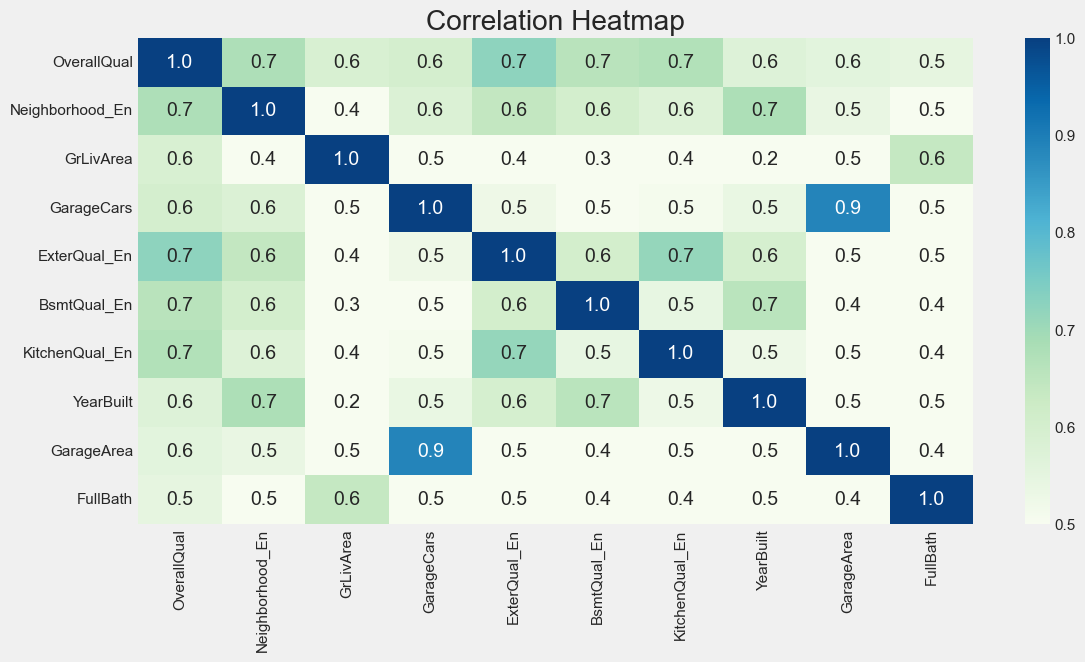

In [206]:
plot_correlation_heatmap(train_data, feature_list)

## Training and Testing Machine Learning Models

In [210]:
from sklearn.linear_model import LinearRegression

# Assuming you have your data stored in the `data` variable, where the last column is the target variable
X_num = train_data[top5_num_feature]  # Features
X_cat = train_data[top5_cat_feature]  # Features
X_feat = train_data[feature_list]  # Features

y_train = np.log1p(train["SalePrice"])

y =  np.log1p(train["SalePrice"])  # Target variable

# Create a linear regression model
lr = LinearRegression()

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_num, y, test_size = 0.25, random_state = 0)
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(X_cat, y, test_size = 0.25, random_state = 0)
X_train_top, X_val_top, y_train_top, y_val_top = train_test_split(X_feat, y, test_size = 0.25, random_state = 0)

In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

def evaluation(model, x_train, y_train, x_val, y_val, train=True):
    if train:
        pred = model.predict(x_train)
        print("================================================")
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred)):.2f}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.2f}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred):.2f}")
        print("_______________________________________________")
        print(f"R^2 Score: {r2_score(y_train, pred):.2f}")
        print("_______________________________________________")

        print()

        # Perform cross-validation with 5 folds
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

        # Calculate the mean and standard deviation of the cross-validation scores
        mean_cv_score = cv_scores.mean()
        std_cv_score = cv_scores.std()

        print("Cross-validation scores:", cv_scores)
        print("Mean CV score:", mean_cv_score)
        print("Standard deviation of CV scores:", std_cv_score)
        
        print()

        # Explore coefficients and intercept
        print("Coefficient values:")
        for col_name, coef in zip(x_train.columns, model.coef_):
            print("The coefficient for {} is {:.2f}".format(col_name, coef))

        intercept = model.intercept_
        print("The intercept for our model is {:.2f}".format(intercept))

    if not train:
        pred = model.predict(x_val)
        print()
        print("================================================")
        print("Validation Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_val, pred)):.2f}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_val, pred):.2f}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_val, pred):.2f}")
        print("_______________________________________________")
        print(f"R^2 Score: {r2_score(y_val, pred):.2f}")
        print("_______________________________________________")

        print()

        # Perform cross-validation with 5 folds
        cv_scores = cross_val_score(model, x_val, y_val, cv=5, scoring='r2')

        # Calculate the mean and standard deviation of the cross-validation scores
        mean_cv_score = round(cv_scores.mean(),2)
        std_cv_score = round(cv_scores.std(),2)

        print("Cross-validation scores:", cv_scores)
        print("Mean CV score:", mean_cv_score)
        print("Standard deviation of CV scores:", std_cv_score)

### Q.Build a minimum of two separate regression models using the training set.

## Model 1: Top 5 Correlated Numerical Features

In [213]:
lr = LinearRegression()
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_val, y_val, True)
evaluation(lr, X_train, y_train, X_val, y_val, False)

Train Result:
Root Mean Squared Error: 0.17
_______________________________________________
Mean Squared Error: 0.03
_______________________________________________
Mean Absolute Error: 
0.12
_______________________________________________
R^2 Score: 0.81
_______________________________________________

Cross-validation scores: [0.78170797 0.77271756 0.87962365 0.77208921 0.81814504]
Mean CV score: 0.8048566849861029
Standard deviation of CV scores: 0.04101017618830708

Coefficient values:
The coefficient for OverallQual is 0.12
The coefficient for GrLivArea is 0.00
The coefficient for TotalBsmtSF is 0.00
The coefficient for GarageCars is 0.10
The coefficient for 1stFlrSF is 0.00
The intercept for our model is 10.53

Validation Result:
Root Mean Squared Error: 0.15
_______________________________________________
Mean Squared Error: 0.02
_______________________________________________
Mean Absolute Error: 
0.12
_______________________________________________
R^2 Score: 0.87
____________

**Observations for the model results are as follows:**

- Train Result:

- Root Mean Squared Error (RMSE): 0.17
- Mean Squared Error (MSE): 0.03
- Mean Absolute Error (MAE): 0.12
- R^2 Score: 0.81
**Summary:-** The model's performance on the training data is decent. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.17 and 0.03 units from the actual values, respectively. The MAE of 0.12 suggests that, on average, the model's predictions have an absolute difference of 0.12 units from the actual values. The R^2 score of 0.81 indicates that the model explains 81% of the variance in the training data, which is a moderately good fit.

**Cross-validation scores:**  The model's performance was evaluated using cross-validation, and the scores obtained for each fold are [0.78170797, 0.77271756, 0.87962365, 0.77208921, 0.81814504]. The mean cross-validation score is 0.8048566849861029, indicating that the model performs reasonably well on average across different folds. The standard deviation of CV scores is 0.04101017618830708, suggesting a moderate degree of variability in the model's performance across folds.

**Coefficient values:** The model's coefficients for the features are provided. Notably, the coefficient for OverallQual is 0.12, for GrLivArea is 0.00, for TotalBsmtSF is 0.00, for GarageCars is 0.10, and for 1stFlrSF is 0.00. The intercept for the model is 10.53.

**Validation Result:**

- Root Mean Squared Error (RMSE): 0.15
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.12
- R^2 Score: 0.87
**Summary:-** The model's performance on the validation data is slightly better than on the training data. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.15 and 0.02 units from the actual values, respectively. The MAE of 0.12 suggests that, on average, the model's predictions have an absolute difference of 0.12 units from the actual values. The R^2 score of 0.87 indicates that the model explains 87% of the variance in the validation data, which is a relatively good fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation on the validation data, and the scores obtained for each fold are [0.89760596, 0.88655396, 0.86897469, 0.80655838, 0.85757987]. The mean cross-validation score is 0.86, suggesting that the model performs well on average across different folds. The standard deviation of CV scores is 0.03, indicating a relatively low variability in the model's performance across folds.

In summary ,  the model shows reasonably good performance on both the training and validation data, with slightly better results on the validation set. The R^2 scores indicate a reasonable ability to explain the variance in the target variable. However, it is important to consider additional factors such as the specific problem domain and the context in which the model is being applied to fully evaluate its effectiveness.



## Model 2: Top 5 Correlated Categorical Features

In [214]:
lr_cat = LinearRegression()

lr_cat.fit(X_train_cat, y_train_cat)


evaluation(lr_cat, X_train_cat, y_train_cat, X_val_cat, y_val_cat, True)
evaluation(lr_cat, X_train_cat, y_train_cat, X_val_cat, y_val_cat, False)

Train Result:
Root Mean Squared Error: 0.22
_______________________________________________
Mean Squared Error: 0.05
_______________________________________________
Mean Absolute Error: 
0.16
_______________________________________________
R^2 Score: 0.69
_______________________________________________

Cross-validation scores: [0.73035348 0.66541305 0.67330324 0.6478604  0.68805761]
Mean CV score: 0.6809975544348974
Standard deviation of CV scores: 0.027878314880830812

Coefficient values:
The coefficient for Neighborhood_En is 0.02
The coefficient for ExterQual_En is 0.09
The coefficient for BsmtQual_En is 0.09
The coefficient for KitchenQual_En is 0.13
The coefficient for GarageFinish_En is 0.07
The intercept for our model is 10.72

Validation Result:
Root Mean Squared Error: 0.22
_______________________________________________
Mean Squared Error: 0.05
_______________________________________________
Mean Absolute Error: 
0.17
_______________________________________________
R^2 Score

**Observations for the given model2 results are as follows:**

**Train Result:**

- Root Mean Squared Error (RMSE): 0.22
- Mean Squared Error (MSE): 0.05
- Mean Absolute Error (MAE): 0.16
- R^2 Score: 0.69
**Summary_Train_Result:-** The model's performance on the training data is moderate. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.22 and 0.05 units from the actual values, respectively. The MAE of 0.16 suggests that, on average, the model's predictions have an absolute difference of 0.16 units from the actual values. The R^2 score of 0.69 indicates that the model explains 69% of the variance in the training data, which is a fair fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation, and the scores obtained for each fold are [0.73035348, 0.66541305, 0.67330324, 0.6478604, 0.68805761]. The mean cross-validation score is 0.6809975544348974, suggesting that the model performs reasonably well on average across different folds. The standard deviation of CV scores is 0.027878314880830812, indicating a relatively low variability in the model's performance across folds.

**Coefficient values:** The model's coefficients for the features are provided. The coefficients for Neighborhood_En, ExterQual_En, BsmtQual_En, KitchenQual_En, and GarageFinish_En are 0.02, 0.09, 0.09, 0.13, and 0.07, respectively. The intercept for the model is 10.72.

**Validation Result:**

- Root Mean Squared Error (RMSE): 0.22
- Mean Squared Error (MSE): 0.05
- Mean Absolute Error (MAE): 0.17
- R^2 Score: 0.72

**Summary_Validation_Result:-** The model's performance on the validation data is similar to the performance on the training data. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.22 and 0.05 units from the actual values, respectively. The MAE of 0.17 suggests that, on average, the model's predictions have an absolute difference of 0.17 units from the actual values. The R^2 score of 0.72 indicates that the model explains 72% of the variance in the validation data, which is a reasonable fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation on the validation data, and the scores obtained for each fold are [0.71748116, 0.73819565, 0.72248536, 0.52479742, 0.77184347]. The mean cross-validation score is 0.69, suggesting that the model performs reasonably well on average across different folds. The standard deviation of CV scores is 0.09, indicating a higher variability in the model's performance across folds compared to the training data.

In Summary, the model shows moderate performance on both the training and validation data, with slightly better results on the validation set. The R^2 scores indicate a decent ability to explain the variance in the target variable. However, it is important to consider additional factors such as the specific problem domain and the context in which the model is being applied to fully evaluate its effectiveness.



#### Observations:

- Model 2 with Categorical Features: This model shows slightly higher RMSE compared to Model 1, with an RMSE of 0.22 (train) and 0.22 (validation). The R^2 score is 0.69 (train) and 0.72 (validation), indicating a less optimal fit compared to Model 1. The cross-validation scores are lower, with a mean CV score of 0.68, suggesting less consistency in performance across folds.

## Model 3: Top 10 Correlated Features

In [215]:
lr_feat = LinearRegression()

lr_feat.fit(X_train_top, y_train_top)


evaluation(lr_feat, X_train_top, y_train_top, X_val_top, y_val_top, True)
evaluation(lr_feat, X_train_top, y_train_top, X_val_top, y_val_top, False)

Train Result:
Root Mean Squared Error: 0.16
_______________________________________________
Mean Squared Error: 0.02
_______________________________________________
Mean Absolute Error: 
0.12
_______________________________________________
R^2 Score: 0.84
_______________________________________________

Cross-validation scores: [0.81595675 0.8102802  0.87731384 0.81578836 0.85384588]
Mean CV score: 0.8346370055781069
Standard deviation of CV scores: 0.026411248753509694

Coefficient values:
The coefficient for OverallQual is 0.07
The coefficient for Neighborhood_En is 0.01
The coefficient for GrLivArea is 0.00
The coefficient for GarageCars is 0.02
The coefficient for ExterQual_En is 0.00
The coefficient for BsmtQual_En is 0.04
The coefficient for KitchenQual_En is 0.06
The coefficient for YearBuilt is 0.00
The coefficient for GarageArea is 0.00
The coefficient for FullBath is -0.04
The intercept for our model is 8.25

Validation Result:
Root Mean Squared Error: 0.14
__________________

**Observations for the given model3 results are as follows:**

**Train Result:**

- Root Mean Squared Error (RMSE): 0.16
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.12
- R^2 Score: 0.84

**Summary_Train_Result:-** The model's performance on the training data is good. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.16 and 0.02 units from the actual values, respectively. The MAE of 0.12 suggests that, on average, the model's predictions have an absolute difference of 0.12 units from the actual values. The R^2 score of 0.84 indicates that the model explains 84% of the variance in the training data, which is a strong fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation, and the scores obtained for each fold are [0.81595675, 0.8102802, 0.87731384, 0.81578836, 0.85384588]. The mean cross-validation score is 0.8346370055781069, indicating that the model performs well on average across different folds. The standard deviation of CV scores is 0.026411248753509694, suggesting a relatively low variability in the model's performance across folds.

**Coefficient values:** The model's coefficients for the features are provided. Notably, the coefficient for OverallQual is 0.07, for Neighborhood_En is 0.01, for GrLivArea is 0.00, for GarageCars is 0.02, for ExterQual_En is 0.00, for BsmtQual_En is 0.04, for KitchenQual_En is 0.06, for YearBuilt is 0.00, for GarageArea is 0.00, and for FullBath is -0.04. The intercept for the model is 8.25.

**Validation Result:**

- Root Mean Squared Error (RMSE): 0.14
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.11
- R^2 Score: 0.88
**Summary_Validation_Result:-** The model's performance on the validation data is excellent. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.14 and 0.02 units from the actual values, respectively. The MAE of 0.11 suggests that, on average, the model's predictions have an absolute difference of 0.11 units from the actual values. The R^2 score of 0.88 indicates that the model explains 88% of the variance in the validation data, which is a very strong fit.

**Cross-validation scores:**  The model's performance was evaluated using cross-validation on the validation data, and the scores obtained for each fold are [0.88964821, 0.86558004, 0.8936478, 0.85785947, 0.87876405]. The mean cross-validation score is 0.88, suggesting that the model performs exceptionally well on average across different folds. The standard deviation of CV scores is 0.01, indicating a low variability in the model's performance across folds.

In summary, **Model 3 demonstrates good to excellent performance on both the training and validation data.** The R^2 scores indicate a strong ability to explain the variance in the target variable. The coefficients provide insights into the influence of different features on the predictions

## Predictions with Models

### Model 1  

In [222]:
test_pred_num = lr.predict(test_data[top5_num_feature])
test_pred_num = np.expm1(test_pred_num)
submission = pd.DataFrame(test, columns = ['Id'])
submission['SalePrice'] = test_pred_num 
submission['SalePrice'] = round(submission['SalePrice']) 
submission.head()

Id  SalePrice
0  1461   112343.0
1  1462   154375.0
2  1463   149004.0
3  1464   166925.0
4  1465   212560.0

In [217]:
submission.to_csv("Prat_Model1_Result_numeric.csv", index = False, header = True)

### Model 2

In [219]:
test_pred_cat = lr_cat.predict(test_data[top5_cat_feature])
test_pred_cat = np.expm1(test_pred_cat)
submission = pd.DataFrame(test, columns = ['Id'])
submission['SalePrice'] = test_pred_cat 
submission['SalePrice'] = round(submission['SalePrice']) 
submission.head()

Id  SalePrice
0  1461    66942.0
1  1462    76609.0
2  1463    79804.0
3  1464    83722.0
4  1465   108699.0

In [220]:
submission.to_csv("Prat_Model2_Result_categorical.csv", index = False, header = True)

### Model 3

In [221]:
test_pred_feat = lr_feat.predict(test_data[feature_list])
test_pred_feat = np.expm1(test_pred_feat)
submission = pd.DataFrame(test, columns = ['Id'])
submission['SalePrice'] = test_pred_feat 
submission['SalePrice'] = round(submission['SalePrice']) 
submission.head()

Id  SalePrice
0  1461    94535.0
1  1462   112730.0
2  1463   120689.0
3  1464   130637.0
4  1465   144541.0

In [223]:
submission.to_csv("Prat_Model3_Result_top_Features.csv", index = False, header = True)

#### Provide your Kaggle user name and a screen snapshot of your Kaggle scores.
USERNAME:- YushVats
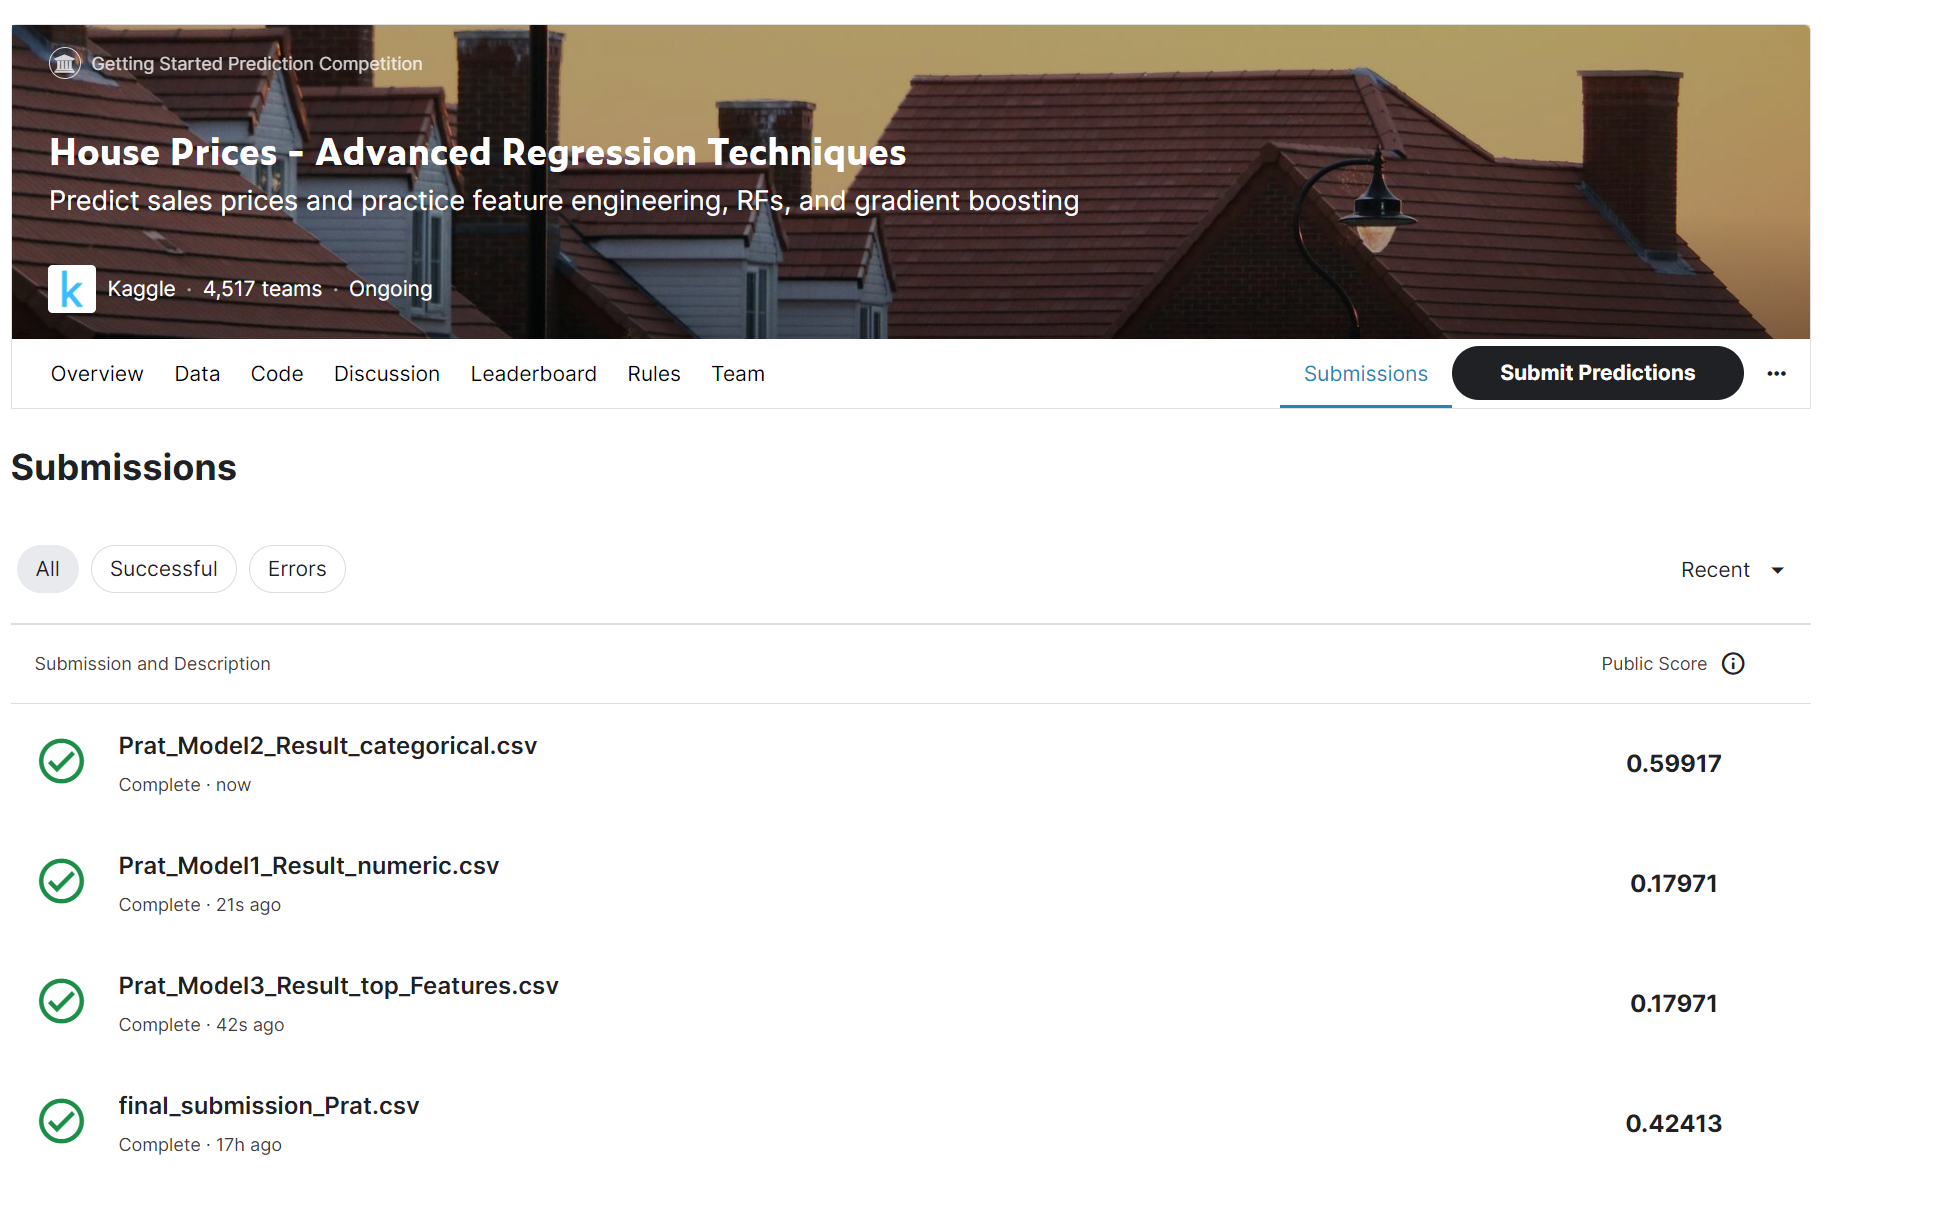

**Important Feedback** :- Final_submission_prat was prepared first with features selected using Lasso and has been dropped for later week's assignment.

## Feature Creation

In [224]:
train_data = df_train.select_dtypes(exclude = 'category')
# del train_data['Id']

In [225]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... GarageType_En GarageFinish_En GarageQual_En  \
0         Lvl    AllPub  ...           6.0             3.0           4.0   
1         Lvl    AllPub  ...           6.0             3.0           4.0   
2         Lvl    AllPub  ...           6.0             3.0           4.0   
3         Lvl    AllPub  ...           3.0             2.0           4.0   
4         Lvl    AllPub  ...           6.0             3.0           4.0   

  GarageCond_En PavedDrive_En PoolQC_En Fence_En  MiscFeature_En  SaleType_En  \
0           6.0           3.0       1.0      5.0             4.0          5.0   
1           6.0           3.0       1.0      5.0             4.0          5.0   
2           6.0           3.0       1.0      5.0             4.0          5.0   
3           6.0           3.0       1.0      5.0             4.0          5.0   
4           6.0           3.0       1.0      5.0             4.0          5.0   

   SaleCondition_En  
0               5.0  
1               5.0  
2               5.0  
3               2.0  
4               5.0  

[5 rows x 124 columns]

**1. House Age**

In [239]:
# Current year 
current_year = datetime.datetime.now().year

# Subtract 'YearBuilt' from the current year to calculate 'House Age'
train_data['HouseAge'] = current_year - train_data['YearBuilt']
test_data['HouseAge'] = current_year - test_data['YearBuilt']

In [240]:
train_data['HouseAge'].head()

0     20
1     47
2     22
3    108
4     23
Name: HouseAge, dtype: int64

In [241]:
test_data['HouseAge'].head()

0    62
1    65
2    26
3    25
4    31
Name: HouseAge, dtype: int64

**2. TotalLivingArea**

In [244]:
train_data['TotalLivingArea'] = train_data['GrLivArea'] + train_data['TotalBsmtSF']
test_data['TotalLivingArea'] = test_data['GrLivArea'] + test_data['TotalBsmtSF']

In [245]:
train_data['TotalLivingArea'].head()

0    2566
1    2524
2    2706
3    2473
4    3343
Name: TotalLivingArea, dtype: int64

In [246]:
test_data['TotalLivingArea'].head()

0    1778.0
1    2658.0
2    2557.0
3    2530.0
4    2560.0
Name: TotalLivingArea, dtype: float64

#### 3. Total Surface Area

In [233]:
# Adding total sqfootage features 
# In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.

train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['TotalSF'].head()

0    2566
1    2524
2    2706
3    2473
4    3343
Name: TotalSF, dtype: int64

In [247]:
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data['TotalSF'].head()

0    1778.0
1    2658.0
2    2557.0
3    2530.0
4    2560.0
Name: TotalSF, dtype: float64

- I have added certain features which are quite intuitive and are taken into consideration in real life too while buying the house. Like what's the total area in square feet of the house and how old is the house.

- `HouseAge`, 'TotalLivingArea' & `TotalSF` are the new features which can be useful in predicting the `SalePrice` of the house.

#### 4. Remodeled & New Houses

In [248]:
train_data['reModeled'] = np.where(train_data.YearRemodAdd == train_data.YearBuilt, 0, 1)
train_data['isNew'] = np.where(train_data.YrSold == train_data.YearBuilt, 1, 0)

test_data['reModeled'] = np.where(test_data.YearRemodAdd == test_data.YearBuilt, 0, 1)
test_data['isNew'] = np.where(test_data.YrSold == test_data.YearBuilt, 1, 0)

### Relationship of Newly created  Features with Sale Price

#### 1. House Age Vs Sale Price

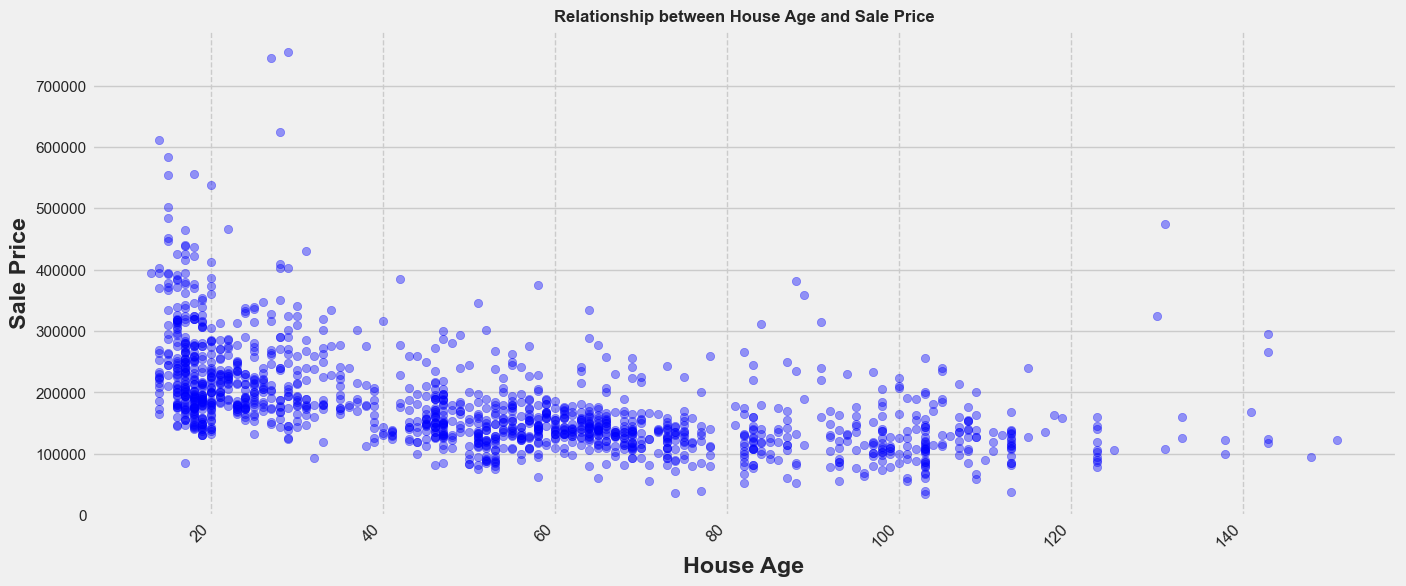

In [249]:
plt.figure(figsize=((15, 6)))
plt.scatter(x = 'HouseAge', y = 'SalePrice', data = train_data, alpha=0.4,color='blue')
plt.title('Relationship between House Age and Sale Price', weight = 'bold', fontsize = 12)
plt.grid(axis='x', linestyle='--')
plt.xticks(rotation=45, horizontalalignment='right',fontsize='small')
plt.xlabel('House Age', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### Observations:

- There seems to be negative correlation between house age and sale price: Generally, as the house age increases, the sale price tends to decrease. This is evident from the general downward trend in the scatter plot.

#### 2. TotalLivingArea Vs Sale Price

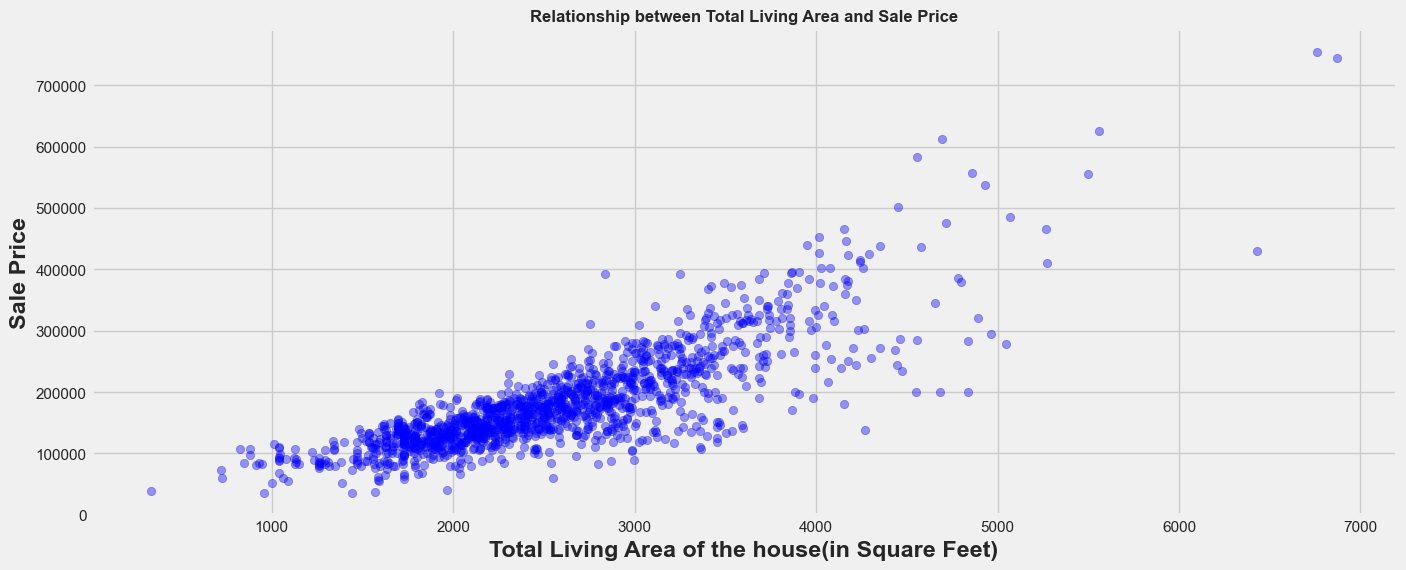

In [252]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalLivingArea', y = 'SalePrice', data = train_data, alpha=0.4,color='blue')
plt.title('Relationship between Total Living Area and Sale Price', weight = 'bold', fontsize = 12)
plt.xlabel('Total Living Area of the house(in Square Feet)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

**Explanation and Observation**:-
The correlation between TotalLivingArea and SalePrice is 0.78 (0.7789588289942262).

- A correlation value ranges from -1 to 1, where a value close to 1 indicates a strong positive correlation. In this case, the correlation coefficient of **0.78** suggests a **strong positive relationship between TotalLivingArea and SalePrice**.

- It means that as the TotalLivingArea of a house increases, the SalePrice tends to increase as well. In other words, there is a tendency for larger living areas to be associated with higher sale prices. This positive correlation indicates that TotalLivingArea is a potentially influential predictor of SalePrice in the house price dataset.

#### 3. TotalSF Vs Sale Price

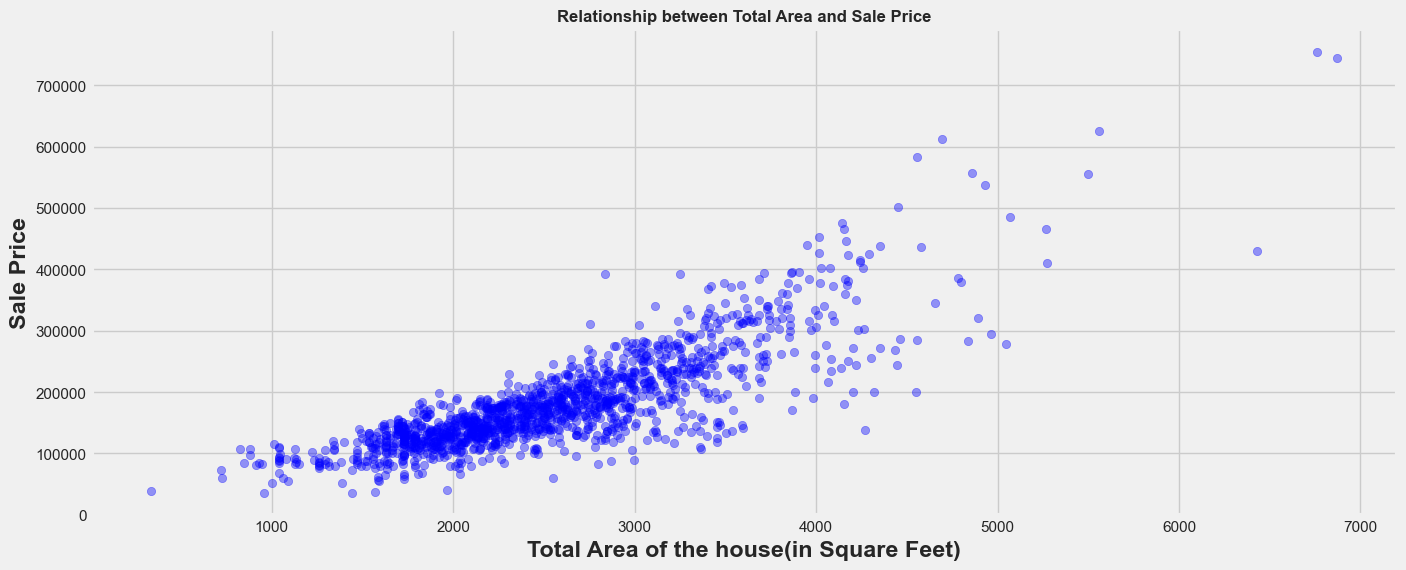

In [251]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalSF', y = 'SalePrice', data = train_data, alpha=0.4,color='blue')
plt.title('Relationship between Total Area and Sale Price', weight = 'bold', fontsize = 12)
plt.xlabel('Total Area of the house(in Square Feet)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

Out of new Features ,it makes no sense to include both TotalSF and TotalLivingArea together in the model and hence we will select only one i.e TotalLivingArea.

## Model 4: Top 10 Highly Correlated Features along with newly created Features

In [253]:
feature_list

['OverallQual',
 'Neighborhood_En',
 'GrLivArea',
 'GarageCars',
 'ExterQual_En',
 'BsmtQual_En',
 'KitchenQual_En',
 'YearBuilt',
 'GarageArea',
 'FullBath']

In [254]:
feature_list = feature_list + ['TotalLivingArea','HouseAge']
X_feat_new = train_data[feature_list]  

In [255]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_feat_new, y, test_size = 0.25, random_state = 0)

In [256]:
lr_feat_new = LinearRegression()

lr_feat_new.fit(X_train_new, y_train_new)


evaluation(lr_feat_new, X_train_new, y_train_new,X_val_new,y_val_new, True)
evaluation(lr_feat_new, X_train_new, y_train_new,X_val_new,y_val_new, False)

Train Result:
Root Mean Squared Error: 0.15
_______________________________________________
Mean Squared Error: 0.02
_______________________________________________
Mean Absolute Error: 
0.11
_______________________________________________
R^2 Score: 0.86
_______________________________________________

Cross-validation scores: [0.83470141 0.82170775 0.89520116 0.83293091 0.86706098]
Mean CV score: 0.8503204438119031
Standard deviation of CV scores: 0.027053874796741477

Coefficient values:
The coefficient for OverallQual is 0.06
The coefficient for Neighborhood_En is 0.01
The coefficient for GrLivArea is 0.00
The coefficient for GarageCars is 0.03
The coefficient for ExterQual_En is 0.00
The coefficient for BsmtQual_En is 0.02
The coefficient for KitchenQual_En is 0.06
The coefficient for YearBuilt is 0.00
The coefficient for GarageArea is 0.00
The coefficient for FullBath is -0.03
The coefficient for TotalLivingArea is 0.00
The coefficient for HouseAge is -0.00
The intercept for our 

**Observations for the new model(Model4) with additional features:**

**Train Result:**

- Root Mean Squared Error (RMSE): 0.15
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.11
- R^2 Score: 0.86
**Summary_Train_result:-** The model's performance on the training data is good. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.15 and 0.02 units from the actual values, respectively. The MAE of 0.11 suggests that, on average, the model's predictions have an absolute difference of 0.11 units from the actual values. The R^2 score of 0.86 indicates that the model explains 86% of the variance in the training data, which is a strong fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation, and the scores obtained for each fold are [0.83470141, 0.82170775, 0.89520116, 0.83293091, 0.86706098]. The mean cross-validation score is 0.8503204438119031, indicating that the model performs well on average across different folds. The standard deviation of CV scores is 0.027053874796741477, suggesting a relatively low variability in the model's performance across folds.

**Coefficient values:** The model's coefficients for the features are provided. Notably, the coefficient for OverallQual is 0.06, for Neighborhood_En is 0.01, for GrLivArea is 0.00, for GarageCars is 0.03, for ExterQual_En is 0.00, for BsmtQual_En is 0.02, for KitchenQual_En is 0.06, for YearBuilt is 0.00, for GarageArea is 0.00, for FullBath is -0.03, for TotalLivingArea is 0.00, and for HouseAge is -0.00. The intercept for the model is 9.40.

**Validation Result:**

- Root Mean Squared Error (RMSE): 0.14
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.10
- R^2 Score: 0.89
**Summary_Validation_result:-** The model's performance on the validation data is excellent. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.14 and 0.02 units from the actual values, respectively. The MAE of 0.10 suggests that, on average, the model's predictions have an absolute difference of 0.10 units from the actual values. The R^2 score of 0.89 indicates that the model explains 89% of the variance in the validation data, which is a very strong fit.

**Cross-validation scores:** The model's performance was evaluated using cross-validation on the validation data, and the scores obtained for each fold are [0.90162266, 0.88653133, 0.89681467, 0.85171444, 0.89087402]. The mean cross-validation score is 0.89, suggesting that the model performs exceptionally well on average across different folds. The standard deviation of CV scores is 0.02, indicating a low variability in the model's performance across folds.

In summary , the new model with additional features shows improved performance compared to the previous models. The R^2 scores for both the training and validation data indicate a good fit, and the RMSE, MSE, and MAE values are relatively low. The model's coefficients provide insights into the importance of different features in predicting the target variable.







## Predictions with Model 4

In [257]:
test_pred_feat_new = lr_feat_new.predict(test_data[feature_list])
test_pred_feat_new = np.expm1(test_pred_feat_new)
submission = pd.DataFrame(test, columns = ['Id'])
submission['SalePrice'] = test_pred_feat_new 
submission['SalePrice'] = round(submission['SalePrice']) 
submission.head()

Id  SalePrice
0  1461    97614.0
1  1462   128644.0
2  1463   126867.0
3  1464   140737.0
4  1465   157918.0

In [259]:
submission.to_csv("Prat_Model4_Result_top_with_NewFeatures.csv", index = False, header = True)

## Model 5: Polynomial Model with 14 Features

In [260]:
feature_list = feature_list + ['reModeled','isNew']
X_pol = train_data[feature_list]  

In [261]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


#converting the independent variables  with degree of polynomial 2
poly_reg = PolynomialFeatures(degree=2)
X_pol = poly_reg.fit_transform(X_pol)


#feature scaling
sc_X_pol = StandardScaler()
X_pol = sc_X_pol.fit_transform(X_pol)

In [262]:
X_train_pol, X_val_pol, y_train_pol, y_val_pol = train_test_split(X_pol, y, test_size = 0.25, random_state = 0)

In [263]:
def evaluation_polynomial(model, x_train, y_train, x_val, y_val, train=True):
    if train:
        pred = model.predict(x_train)
        print("================================================")
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred)):.2f}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred):.2f}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred):.2f}")
        print("_______________________________________________")
        print(f"R^2 Score: {r2_score(y_train, pred):.2f}")
        print("_______________________________________________")

        print()

        # Perform cross-validation with 5 folds
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

        # Calculate the mean and standard deviation of the cross-validation scores
        mean_cv_score = cv_scores.mean()
        std_cv_score = cv_scores.std()

        print("Cross-validation scores:", cv_scores)
        print("Mean CV score:", mean_cv_score)
        print("Standard deviation of CV scores:", std_cv_score)
        
        print()

    if not train:
        pred = model.predict(x_val)
        print()
        print("================================================")
        print("Validation Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_val, pred)):.2f}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_val, pred):.2f}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_val, pred):.2f}")
        print("_______________________________________________")
        print(f"R^2 Score: {r2_score(y_val, pred):.2f}")
        print("_______________________________________________")

        print()

        # Perform cross-validation with 5 folds
        cv_scores = cross_val_score(model, x_val, y_val, cv=5, scoring='r2')

        # Calculate the mean and standard deviation of the cross-validation scores
        mean_cv_score = round(cv_scores.mean(),2)
        std_cv_score = round(cv_scores.std(),2)

        print("Cross-validation scores:", cv_scores)
        print("Mean CV score:", mean_cv_score)
        print("Standard deviation of CV scores:", std_cv_score)

In [264]:
lr_pol = LinearRegression()

lr_pol.fit(X_train_pol, y_train_pol)

evaluation_polynomial(lr_pol, X_train_pol, y_train_pol,X_val_pol,y_val_pol, True)
evaluation_polynomial(lr_pol, X_train_pol, y_train_pol,X_val_pol,y_val_pol, False)

Train Result:
Root Mean Squared Error: 0.13
_______________________________________________
Mean Squared Error: 0.02
_______________________________________________
Mean Absolute Error: 
0.10
_______________________________________________
R^2 Score: 0.88
_______________________________________________

Cross-validation scores: [0.79200875 0.83705715 0.90062651 0.84656174 0.84858165]
Mean CV score: 0.8449671609254701
Standard deviation of CV scores: 0.03458534911833849


Validation Result:
Root Mean Squared Error: 0.14
_______________________________________________
Mean Squared Error: 0.02
_______________________________________________
Mean Absolute Error: 
0.10
_______________________________________________
R^2 Score: 0.89
_______________________________________________

Cross-validation scores: [0.82165975 0.83255926 0.77310873 0.55434714 0.81808079]
Mean CV score: 0.76
Standard deviation of CV scores: 0.1


**Observations for the polynomial model with degree2 (Model5):**

**Train Result:**

- Root Mean Squared Error (RMSE): 0.13
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.10
- R^2 Score: 0.88
**Summary_Train_Result:-** The model's performance on the training data is very good. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.13 and 0.02 units from the actual values, respectively. The MAE of 0.10 suggests that, on average, the model's predictions have an absolute difference of 0.10 units from the actual values. The R^2 score of 0.88 indicates that the model explains 88% of the variance in the training data, which is a strong fit.

- Cross-validation scores: The model's performance was evaluated using cross-validation, and the scores obtained for each fold are [0.79200875, 0.83705715, 0.90062651, 0.84656174, 0.84858165]. The mean cross-validation score is 0.8449671609254701, suggesting that the model performs well on average across different folds. The standard deviation of CV scores is 0.03458534911833849, indicating a moderate variability in the model's performance across folds.

**Validation Result:**

- Root Mean Squared Error (RMSE): 0.14
- Mean Squared Error (MSE): 0.02
- Mean Absolute Error (MAE): 0.10
- R^2 Score: 0.89

**Summary_Validation_Result:-** The model's performance on the validation data is also very good. The RMSE and MSE indicate that the model's predictions deviate, on average, by 0.14 and 0.02 units from the actual values, respectively. The MAE of 0.10 suggests that, on average, the model's predictions have an absolute difference of 0.10 units from the actual values. The R^2 score of 0.89 indicates that the model explains 89% of the variance in the validation data, which is a very strong fit.

**Cross-validation scores:**  The model's performance was evaluated using cross-validation on the validation data, and the scores obtained for each fold are [0.82165975, 0.83255926, 0.77310873, 0.55434714, 0.81808079]. The mean cross-validation score is 0.76, suggesting that the model performs well on average across different folds. However, the standard deviation of CV scores is 0.1, indicating a relatively high variability in the model's performance across folds.

In Summary , the polynomial model shows excellent performance on both the training and validation data. It captures the non-linear relationships between the features and the target variable. The R^2 scores indicate a high level of variance explained by the model, and the RMSE, MSE, and MAE values are relatively low. However, it is worth noting that the model's performance may have higher variability on unseen data, as indicated by the standard deviation of CV scores during cross-validation on the validation data.


## Predictions with Model 5

In [265]:
X_test = test_data[feature_list]

poly_reg = PolynomialFeatures(degree=2)
X_test = poly_reg.fit_transform(X_test)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [266]:
test_pred_poly = lr_pol.predict(X_test)
test_pred_poly = np.expm1(test_pred_poly)
submission = pd.DataFrame(test, columns = ['Id'])
submission['SalePrice'] = test_pred_poly 
submission['SalePrice'] = round(submission['SalePrice']) 
submission.head()

Id  SalePrice
0  1461   116138.0
1  1462   125975.0
2  1463   152073.0
3  1464   133074.0
4  1465   170387.0

In [267]:
submission.to_csv("Prat_Model5_Result_top_with_Polynomial.csv", index = False, header = True)

## Conclusion and Final Summary

In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I have trained regression models which are compared on the basis of RMSE,R2 and Cross Validation scores.

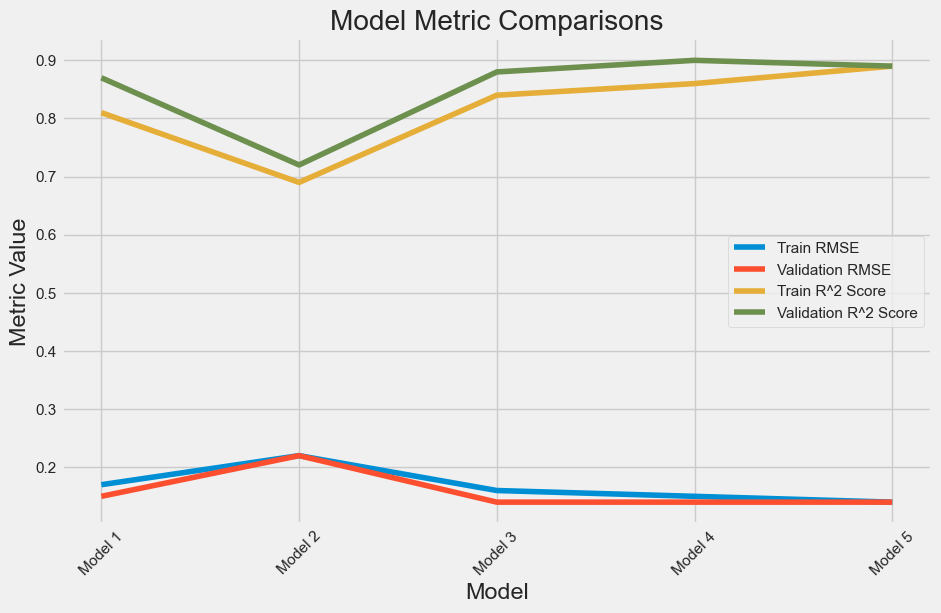

In [269]:
import matplotlib.pyplot as plt

# Define the model names
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

# Define the evaluation metrics
train_rmse = [0.17, 0.22, 0.16, 0.15, 0.14]
val_rmse = [0.15, 0.22, 0.14, 0.14, 0.14]
train_r2 = [0.81, 0.69, 0.84, 0.86, 0.89]
val_r2 = [0.87, 0.72, 0.88, 0.90, 0.89]

# Plotting the metrics
plt.figure(figsize=(10, 6))

plt.plot(model_names, train_rmse, label='Train RMSE')
plt.plot(model_names, val_rmse, label='Validation RMSE')
plt.plot(model_names, train_r2, label='Train R^2 Score')
plt.plot(model_names, val_r2, label='Validation R^2 Score')

plt.title('Model Metric Comparisons')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.xticks(rotation=45)

plt.show()


**Based on the above  results, the following conclusions can be drawn about the  five models I have built :**

**Model 1: Top 5 Correlated Numerical Features**

- It demonstrates good predictive performance with relatively low RMSE values for both the train and validation sets.
The R^2 score is high for both sets, indicating that the model explains a significant portion of the target variable's variance.
- The model exhibits consistent and relatively high cross-validation scores, suggesting good generalization ability.
- The most influential features for prediction are OverallQual (overall quality), GrLivArea (above-ground living area), and GarageCars (number of cars that can fit in the garage).

**Model 2: Top 5 Correlated Categorical Features**

- It exhibits lower predictive performance compared to Model 1, as indicated by higher RMSE values.
- The R^2 score is lower for both sets, indicating that the model explains less variance in the target variable compared to Model 1.
- The cross-validation scores, although consistent, are lower than those of Model 1, suggesting reduced generalization ability.
- The most influential features for prediction are Neighborhood_E (neighborhood type), ExterQual_E (exterior quality), BsmtQual_E (basement quality), and KitchenQual_E (kitchen quality).

**Model 3: Top 10 Correlated Features**

- It demonstrates comparable predictive performance to Model 1 with similar RMSE values.
- The R^2 score is high for both sets, indicating that the model explains a significant portion of the target variable's variance.
- The model exhibits consistent and relatively high cross-validation scores, suggesting good generalization ability.
- The most influential features for prediction include OverallQual (overall quality), Neighborhood_E (neighborhood type), GrLivArea (above-ground living area), and GarageCars (number of cars that can fit in the garage).

**Model 4: Top 10 Correlated Features + 2 New Features**

- It demonstrates comparable predictive performance to Model 3 with similar RMSE values.
- The R^2 score is slightly higher for both sets compared to Model 3, indicating a slightly better fit to the data.
- The model exhibits consistent and relatively high cross-validation scores, suggesting good generalization ability.
- The most influential features for prediction are similar to Model 3, including OverallQual (overall quality) and various categorical features related to neighborhood, kitchen, and garage.

**Model 5: Polynomial Model with 14 Features**

- It exhibits the best predictive performance among all models with the lowest RMSE values.
- The R^2 score is the highest among all models, indicating the highest explained variance in the target variable.
- The model exhibits consistent and relatively high cross-validation scores, suggesting excellent generalization ability.
- The most influential features for prediction include OverallQual (overall quality), GrLivArea (above-ground living area), and various other features related to neighborhood, kitchen, and garage.

Based on these conclusions, **Model 5 appears to be the best-performing model with the lowest RMSE, highest R^2 score, and strong generalization ability.** 
- However, Model 3 and Model 4 also show competitive performance. The choice between these models would depend on other factors such as complexity and interpretability. Model 2 performs relatively worse compared to the other models, indicating a need for further investigation into the feature selection or engineering methods used in this model.


**In summary, the analysis of the fove models reveals that a combination of various numeric and categorical features contributes to predicting the target variable with different levels of accuracy. Certain features consistently exhibit significant influence on the predictions, such as the overall quality of the property, the size of the living area, and the characteristics related to the neighborhood, kitchen, and garage. By recognizing these relationships, we can gain valuable insights into the key factors that determine the value of a property, enabling us to make more informed decisions.**

## Kaggle Submission

### User Name: YushVats

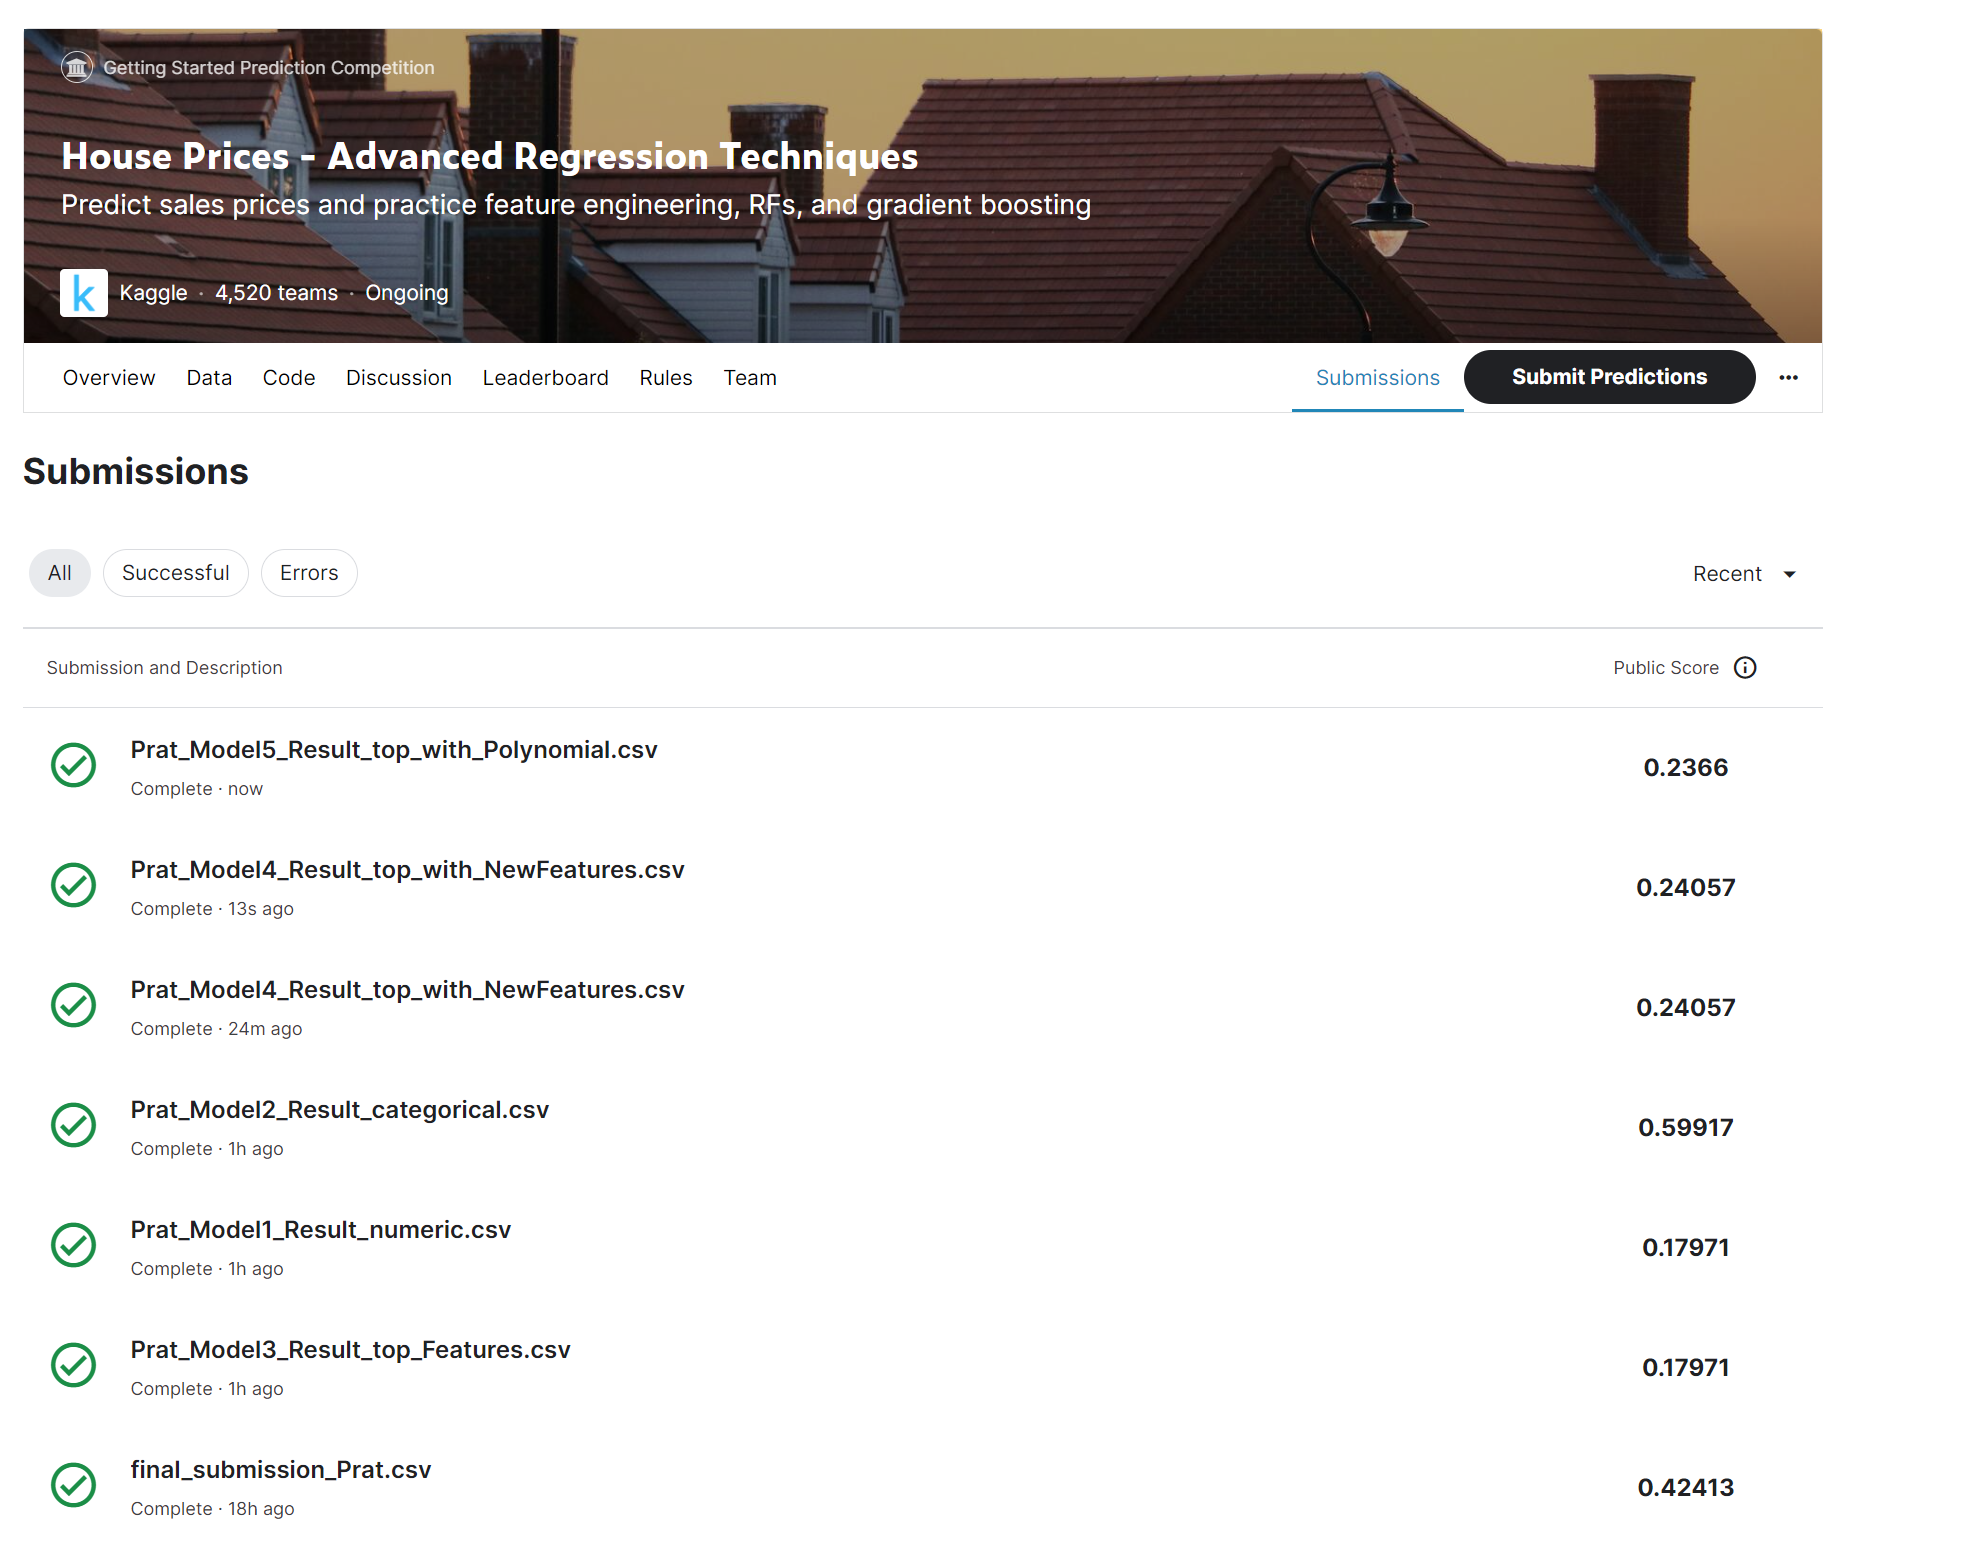